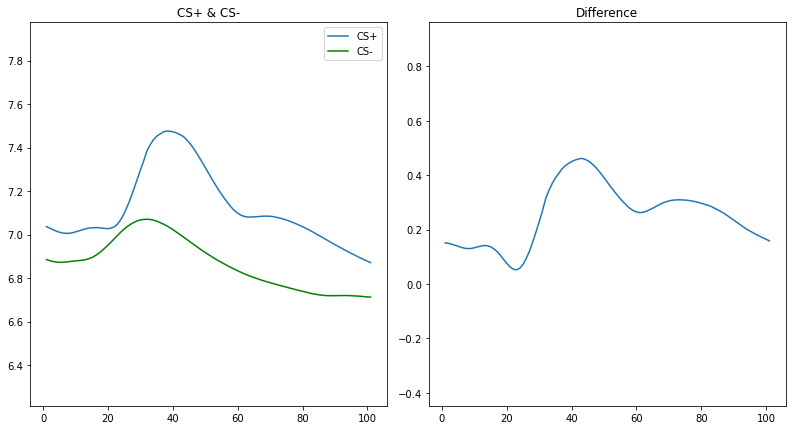

In [39]:
from tkinter import filedialog

#import pandas as pd

import numpy as np

import tkinter as tk

from tkinter import ttk

import tkinter.messagebox

from tkinter import Scale

import matplotlib.pyplot as plt

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

from scipy.signal import find_peaks

#window

window = tk.Tk()
window.title('Fear Display')
window.geometry('800x600')
window.configure(background='white')

#Define Default Parameter
rise_begin = 0.5
rise_end = 4.5
display_window = 10.0
max_rise_time = 5.0
target = 1

#main program
##Find inflection
"""def find_inflection(data):
    inflection_points = list()
    diff_data = np.diff(data[1])
    diff2_data = np.diff(data[1],n=2)
    diff3_data = np.diff(data[1],n=3)
    for i in range(0, len(data[1]) - 3):
        if (diff2_data[i] < 0+10**(-5)) & (diff2_data[i] > 0-10**(-5)):
            if  (diff3_data[i] > 0) &(diff_data[i+1] < 0.005):
                inflection_points.append(i+2)
    return(inflection_points)"""
##Define SCR Response
def SCR_resp(rise_begin, rise_end, max_rise_time, situation, target,display_window):
    #initialize min and max index
    max_index = 0
    min_index = 0
    place_SCR = df.loc[df[2] == situation].iloc[-target][0]
    # Estimate CS Response
    #SCR_start = df[(df[0] >= place_SCR + rise_begin) & (df[0] <= place_SCR + rise_end)]
    #SCR_window = df[(df[0]>= place_SCR + rise_begin) & (df[0]<= place_SCR+display_window-rise_begin)]
    ## find the space of scr response 
    SCR_start = df[(df[0] >= place_SCR + rise_begin) & (df[0] <= place_SCR + rise_end)]
    SCR_df = df[(df[0]>= place_SCR) & (df[0]<= place_SCR+display_window)]
    trough_index = find_peaks(-SCR_start[1])[0]
    SCR_response = 0
    ## if there is not trougt found in the space
    if len(trough_index) == 0 :
        SCR_response = 0
        min_index = 0
        max_index = 0
        # if we ignore rise_begin
        if rise_begin == 0:
            min_index = SCR_start[1].idxmin()
            if (min_index+int(max_rise_time/0.1)) <= SCR_df.iloc[-1].name:
                SCR_peaks = SCR_df.loc[min_index:min_index + int(max_rise_time/0.1)]
            else:
                SCR_peaks = SCR_df.loc[min_index:]
            peak_index = find_peaks(SCR_peaks[1])[0]
            SCR_min = SCR_peaks[1].iloc[0]
            #if no peak
            if len(peak_index) == 0 :
                SCR_response = 0
                min_index = 0
                max_index = 0
            #if peak
            else:
                SCR_peakrow = SCR_peaks.iloc[peak_index[0]]
                SCR_max = SCR_peakrow[1]
                SCR_response_temp = SCR_max - SCR_min
                if SCR_response_temp > SCR_response:
                    SCR_response = SCR_response_temp
                    max_index = SCR_peakrow.name
    # if we find trougt in the space
    else:
        for i in range(len(trough_index)):
            SCR_peaks = SCR_df[trough_index[i]+int(rise_begin/0.1):trough_index[i] + int(rise_begin/0.1) + int(max_rise_time/0.1)+1]
            peak_index = find_peaks(SCR_peaks[1])[0]
            SCR_troughrow = SCR_peaks.iloc[0]
            SCR_min = SCR_troughrow[1]
            min_index_temp = SCR_troughrow.name
            # if no peak
            if len(peak_index) == 0:
                SCR_response = 0
                min_index = 0
                max_index = 0
            # if peak
            else:
                SCR_peakrow = SCR_peaks.iloc[peak_index[0]]
                SCR_max = SCR_peakrow[1]
                SCR_response_temp = SCR_max - SCR_min
                if SCR_response_temp > SCR_response:
                    SCR_response = SCR_response_temp
                    max_index = SCR_peakrow.name
                    min_index = min_index_temp
    # draw the response
    SCR_res_figure = SCR_df.loc[min_index:max_index]
    trough_check = find_peaks(-SCR_res_figure[1])[0]
    # if there is trough between the response
    if len(trough_check) != 0:
        SCR_response = 0
        min_index = 0
        max_index = 0
        SCR_res_figure = SCR_df.loc[min_index:max_index]
    return(SCR_response,SCR_df,SCR_res_figure)

#Graph Updata

def update_plot(event=None):
    ##graw graph
    figure.clear()
    # set the number of graph
    ax1 = figure.add_subplot(121)
    ax3 = figure.add_subplot(122)
    # set the y-axis
    ax1.set_ylim(min_y_ax1_ax2 - y_scale_value_ax1.get(),max_y_ax1_ax2 + y_scale_value_ax1.get())
    ax3.set_ylim(min_y_ax3 - y_scale_value_ax3.get(), max_y_ax3 + y_scale_value_ax3.get())
    #plot the graph
    ax1.plot(CSP_df[1],label = "CS+")
    ax1.plot(CSP_res_figure[1],"red")
    ax1.plot(CSM_df[1],"green",label = "CS-")
    ax1.plot(CSM_res_figure[1],"red")
    """for i in range(len(infl)):
        ax1.scatter(infl[i],CSP_df[1].iloc[infl[i]])
    for i in range(len(infl2)):
        ax1.scatter(infl2[i],CSM_df[1].iloc[infl2[i]])"""
    # set title
    ax1.set_title("CS+ & CS-")
    ax1.legend()
    ax3.plot((CSP_df[1] - CSM_df[1]))
    ax3.set_title("Difference")
    plt.tight_layout()
    canvas.draw()

## Find Maximum US
def max_US_resp(rise_begin,rise_end, max_rise_time, target,display_window):
    # set rise_end to capture US response
    if rise_end <= 9.2:
        rise_end = 9.2
    US_len = len(df.loc[df[2] == 3])
    max_us = 0
    # find maximum US response
    max_us_list = [SCR_resp(rise_begin, rise_end, max_rise_time,3,target,display_window)[0] for target in range(1,US_len+1)]
    max_us_temp = max(max_us_list)
    if max_us_temp > max_us and max_us_list != 0 :
        max_us = max_us_temp
    return(max_us)


## Update CS_response

def CS_resp_update(CSP_res_temp,CSM_res_temp,CSP_df_temp,CSM_df_temp,CSP_res_figure_temp,CSM_res_figure_temp):
    global CSP_response
    global CSM_response
    global CSP_df
    global CSM_df
    global CSP_res_figure
    global CSM_res_figure
    # update CS response
    CSP_response = CSP_res_temp
    CSM_response = CSM_res_temp
    CSP_df = CSP_df_temp 
    CSM_df = CSM_df_temp 
    CSP_res_figure = CSP_res_figure_temp
    CSM_res_figure = CSM_res_figure_temp
    # update CS response shown on the GUI
    CSP_label.config(text=f"CS+ Response:{CSP_response:}")
    CSM_label.config(text=f"CS- Response:{CSM_response:}")
    diff = round(CSP_response - CSM_response,4)
    Diff_label.config(text=f"Difference:{diff}")
    reward = round(300 - 100*diff)
    reward_label.config(text=f"Reward:{reward:}")
    # graph SCR response
    if len(CSP_res_figure) != 0:
        CSP_initial = CSP_res_figure.iloc[0].name
        CSP_res_figure.index = range(CSP_df.index.get_loc(CSP_initial)+1,CSP_df.index.get_loc(CSP_initial)+len(CSP_res_figure)+1)
    if len(CSM_res_figure) != 0:
        CSM_initial = CSM_res_figure.iloc[0].name
        CSM_res_figure.index = range(CSM_df.index.get_loc(CSM_initial)+1,CSM_df.index.get_loc(CSM_initial)+len(CSM_res_figure)+1)
    CSP_df.index = range(1,len(CSP_df)+1)
    CSM_df.index = range(1,len(CSM_df)+1)
    ##Find y-axis
    global min_y_ax1_ax2
    global max_y_ax1_ax2
    min_y_ax1_ax2 = min(min(CSP_df[1]),min(CSM_df[1])) - 0.5
    max_y_ax1_ax2 = max(max(CSP_df[1]),max(CSM_df[1])) + 0.5
    global min_y_ax3
    global max_y_ax3
    min_y_ax3 = min(CSP_df[1]-CSM_df[1]) - 0.5
    max_y_ax3 = max(CSP_df[1]-CSM_df[1]) + 0.5
    


##Data analysis
def data_analysis(file_path, rise_begin,rise_end,display_window,max_rise_time,target):
    global CSP_response_ns
    global CSM_response_ns
    global CSP_df_ns
    global CSM_df_ns
    global CSP_res_figure_ns
    global CSM_res_figure_ns
    global CSP_response_stand
    global CSM_response_stand
    global CSP_df_stand
    global CSM_df_stand
    global CSP_res_figure_stand
    global CSM_res_figure_stand
    global df
    # load data
    df = pd.read_csv(file_path, delimiter="\t", header=None)
    #CS Response
    ##CS+
    CSP_fun = SCR_resp(rise_begin,rise_end,max_rise_time,2,target,display_window)
    CSP_response_ns = round(CSP_fun[0],4)
    CSP_df_ns = CSP_fun[1]
    CSP_res_figure_ns = CSP_fun[2]
    ##CS-
    CSM_fun = SCR_resp(rise_begin,rise_end,max_rise_time,1,target,display_window)
    CSM_response_ns = round(CSM_fun[0],4)
    CSM_df_ns = CSM_fun[1]
    CSM_res_figure_ns = CSM_fun[2]
    ##Standarization
    ###US
    max_us = round(max_US_resp(rise_begin,rise_end, max_rise_time, target,display_window),4)
    MUS_label.config(text=f"Max US:{max_us:}")
    ###Standarize CSP and CSM
    CSP_response_stand = round(CSP_response_ns/max_us,4)
    CSM_response_stand = round(CSM_response_ns/max_us,4)
    CSP_df_stand = CSP_df_ns/max_us
    CSM_df_stand = CSM_df_ns/max_us
    CSP_res_figure_stand = CSP_res_figure_ns/max_us
    CSM_res_figure_stand = CSM_res_figure_ns/max_us
    if max_analysis_var.get() == 1:
        CS_resp_update(CSP_response_stand,CSM_response_stand,CSP_df_stand,CSM_df_stand,CSP_res_figure_stand,CSM_res_figure_stand)
    else:
        CS_resp_update(CSP_response_ns,CSM_response_ns,CSP_df_ns,CSM_df_ns,CSP_res_figure_ns,CSM_res_figure_ns)
    # figure
    ##reset index
    """global infl
    infl = find_inflection(CSP_df)
    print(infl)
    global infl2
    infl2 = find_inflection(CSM_df)
    print("CSP",infl2)"""
    ##graw graph
    update_plot()

#parameter update
def adjust_parameters():
    param_window = tk.Toplevel(window)
    param_window.title("Parameter Adjustment")
    
    # Adjust window place
    main_window_x = window.winfo_x()
    main_window_y = window.winfo_y()
    main_window_width = window.winfo_width()
    param_window_x = main_window_x + main_window_width + 10 
    param_window_y = main_window_y
    # Adjust the size of the window
    param_window.geometry("300x250+{}+{}".format(param_window_x, param_window_y))
    
    ## Rise time begin and end 
    tk.Label(param_window, text="Rise Time Begin").pack()
    rise_begin = tk.Entry(param_window)
    rise_begin.insert(0, "0.5")
    rise_begin.pack()
    
    tk.Label(param_window, text="Rise Time End").pack()
    rise_end = tk.Entry(param_window)
    rise_end.insert(0, "4.5")
    rise_end.pack()    
    ## window
    tk.Label(param_window, text="Window").pack()
    display_window = tk.Entry(param_window)
    display_window.insert(0, "10")
    display_window.pack()
    ## maximum rise time
    tk.Label(param_window, text="Maximum Rise Time").pack()
    max_rise_time = tk.Entry(param_window)
    max_rise_time.insert(0, "5.0")
    max_rise_time.pack()
    ##target
    tk.Label(param_window, text="Target").pack()
    target = tk.Entry(param_window)
    target.insert(0, "1")
    target.pack()
    
    confirm_btn = tk.Button(param_window, text="Apply", command=lambda: apply_parameters(rise_begin.get(), rise_end.get(),
                                                                                         display_window.get(), max_rise_time.get(), target.get()))
    confirm_btn.pack()

def apply_parameters(rise_begin, rise_end, display_window, max_rise_time, target):
    try:
        # update parameter
        rise_begin = float(rise_begin)
        rise_end = float(rise_end)
        display_window = float(display_window)
        max_rise_time = float(max_rise_time)
        target = int(target)
        if (target<= 0) or (target>= len(df[df[2]==2])+1):
            ## error
            tk.messagebox.showerror("Invalid Value", "Error, please type valid value.")
        else:
        # Re-plot
            data_analysis(file_path, rise_begin, rise_end, display_window, max_rise_time, target)
    except ValueError:
        tk.messagebox.showerror("Invalid Value", "Error, please type valid value.")

        
        
#Standardize checkbox
def toggle_analysis():
    if max_analysis_var.get() == 1:
        # after standarized 
        CS_resp_update(CSP_response_stand,CSM_response_stand,CSP_df_stand,CSM_df_stand,CSP_res_figure_stand,CSM_res_figure_stand)
        update_plot()
    else:
        #before standarized
        CS_resp_update(CSP_response_ns,CSM_response_ns,CSP_df_ns,CSM_df_ns,CSP_res_figure_ns,CSM_res_figure_ns)
        update_plot()
        

#load file
def open_file():
    global file_path
    file_path = filedialog.askopenfilename(initialdir="/", title="Choose Data", filetypes=(("txt files", "*.txt"), ("all files", "*.*")))
    if file_path:
        data_analysis(file_path,rise_begin,rise_end,display_window,max_rise_time,target)


#Create Bottom
top_frame = tk.Frame(window, bg='white')
top_frame.pack(fill=tk.BOTH)

data_btn = tk.Button(top_frame, text='Input Data (*.txt)', command=open_file)
data_btn.pack(fill=tk.BOTH, expand=True) 

param_btn = tk.Button(top_frame, text='Parameter Adjustment', command=adjust_parameters)
param_btn.pack(fill=tk.BOTH, expand=True) 

# Create a button to trigger analysis
max_analysis_var = tk.IntVar()
max_analysis_checkbox = ttk.Checkbutton(top_frame, text="Standardize", variable=max_analysis_var,command = toggle_analysis)
max_analysis_checkbox.pack(side=tk.LEFT)

# Create a frame to hold the labels
label_frame = tk.Frame(window, bg='white')
label_frame.pack(fill=tk.BOTH, expand=True)

# CS+
CSP_label = tk.Label(label_frame, text="CS+ Response:", font=("Times New Roman", 10), bg='white')
CSP_label.grid(row=1, column=1, padx=30, pady=10)

# CS-
CSM_label = tk.Label(label_frame, text="CS- Response:", font=("Times New Roman", 10), bg='white')
CSM_label.grid(row=1, column=2, padx=30, pady=10)

#Max US

MUS_label = tk.Label(label_frame, text="Max US:", font=("Times New Roman", 10), bg='white')
MUS_label.grid(row=1, column=3, padx=30, pady=10)

# Difference
Diff_label = tk.Label(label_frame, text="Difference:", font=("Times New Roman", 10), bg='white')
Diff_label.grid(row=1, column=4, padx=30, pady=10)

# Reward
reward_label = tk.Label(label_frame, text="Reward: ", font=("Times New Roman", 10), bg='white')
reward_label.grid(row=1, column=5, padx=30, pady=10)

#Create Canvas
middle_frame = tk.Frame(window, bg='white')
middle_frame.pack(fill=tk.BOTH, expand=True)

#create Bar
scale_frame = tk.Frame(window)
scale_frame.pack(side=tk.BOTTOM, fill=tk.BOTH)

y_scale_value_ax1 = tk.DoubleVar(value = 0)
y_scale_ax1 = Scale(scale_frame, from_=0, to=5, resolution=0.01, orient="horizontal", variable=y_scale_value_ax1, command=update_plot, length=350)
y_scale_ax1.pack(side=tk.LEFT, padx=10)

y_scale_value_ax3 = tk.DoubleVar(value = 0)
y_scale_ax3 = Scale(scale_frame, from_=0, to=5, resolution=0.01, orient="horizontal", variable=y_scale_value_ax3, command=update_plot, length=350)
y_scale_ax3.pack(side=tk.RIGHT, padx=10)

#Defalut Canvas
figure = plt.figure(figsize=(10, 6))
canvas = FigureCanvasTkAgg(figure, master=middle_frame)
canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
ax1 = figure.add_subplot(121)
ax3 = figure.add_subplot(122)
ax1.set_ylim(2.0,8.0) 
ax3.set_ylim(-1.0, 1.0) 
window.mainloop()

In [1]:

def SCR_resp(rise_begin, rise_end, max_rise_time, situation, target,display_window,df):
    #initialize min and max index
    max_index = 0
    min_index = 0
    place_SCR = df.loc[df[2] == situation].iloc[target-1][0]
    # Estimate CS Response
    #SCR_start = df[(df[0] >= place_SCR + rise_begin) & (df[0] <= place_SCR + rise_end)]
    #SCR_window = df[(df[0]>= place_SCR + rise_begin) & (df[0]<= place_SCR+display_window-rise_begin)]
    SCR_start = df[(df[0] >= place_SCR + rise_begin) & (df[0] <= place_SCR + rise_end)]
    SCR_df = df[(df[0]>= place_SCR) & (df[0]<= place_SCR+display_window)]
    trough_index = find_peaks(-SCR_start[1])[0]
    SCR_response = 0
    if len(trough_index) == 0 :
        SCR_response = 0
        min_index = 0
        max_index = 0
        if rise_begin == 0:
            min_index = SCR_start[1].idxmin()
            if (min_index+int(max_rise_time/0.1)) <= SCR_df.iloc[-1].name:
                SCR_peaks = SCR_df.loc[min_index:min_index + int(max_rise_time/0.1)]
            else:
                SCR_peaks = SCR_df.loc[min_index:]
            peak_index = find_peaks(SCR_peaks[1])[0]
            SCR_min = SCR_peaks[1].iloc[0]
            if len(peak_index) == 0 :
                SCR_response = 0
                min_index = 0
                max_index = 0
            else:
                SCR_peakrow = SCR_peaks.iloc[peak_index[0]]
                SCR_max = SCR_peakrow[1]
                SCR_response_temp = SCR_max - SCR_min
                if SCR_response_temp > SCR_response:
                    SCR_response = SCR_response_temp
                    max_index = SCR_peakrow.name
    else:
        for i in range(len(trough_index)):
            SCR_peaks = SCR_df[trough_index[i]+int(rise_begin/0.1):trough_index[i] + int(rise_begin/0.1) + int(max_rise_time/0.1)+1]
            peak_index = find_peaks(SCR_peaks[1])[0]
            SCR_troughrow = SCR_peaks.iloc[0]
            SCR_min = SCR_troughrow[1]
            min_index_temp = SCR_troughrow.name
            if len(peak_index) == 0:
                SCR_response = 0
                min_index = 0
                max_index = 0

            else:
                SCR_peakrow = SCR_peaks.iloc[peak_index[0]]
                SCR_max = SCR_peakrow[1]
                SCR_response_temp = SCR_max - SCR_min
                if SCR_response_temp > SCR_response:
                    SCR_response = SCR_response_temp
                    max_index = SCR_peakrow.name
                    min_index = min_index_temp
    SCR_res_figure = SCR_df.loc[min_index:max_index]
    trough_check = find_peaks(-SCR_res_figure[1])[0]
    if len(trough_check) != 0:
        SCR_response = 0
        min_index = 0
        max_index = 0
        SCR_res_figure = SCR_df.loc[min_index:max_index]
    return(SCR_response)


In [2]:
def data_loading(file_path):
    if file_path.endswith(".txt"):  # 确保只读取txt文件
        df = pd.read_csv(file_path, delimiter="\t", header=None)
        return df

In [36]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# 定义函数 data_loading 和 SCR_resp（这里假设这两个函数已经实现）

# 指定要读取的文件夹路径
folder_path = r"C:\Users\sharo\OneDrive\桌面\RA Paper\Data Analysis"

# 创建一个空的 DataFrame 用于存储数据
results = []

#Initialize parameter

rise_begin = 0
rise_end = 4.5
max_rise_time = 5
display_window = 10
phase = "ext"
ext_num = 15

if phase == "acq":
    total_data_df = pd.DataFrame()
elif phase == "ext":
    total_df = {'CS-': [0] * 15, 'CS+': [0] * 15}
    total_df = pd.DataFrame(total_df)

# 遍历文件夹中的所有文件
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    loaded_data = data_loading(file_path)
    situation_data = {}
    
    for situation in range(1, 4):
        ## acq phase 
        if phase == "acq":
            target_num = len(loaded_data[loaded_data[2] == situation]) - ext_num
            if situation == 3 :
                rise_end = 9.2
                target_num = target_num = len(loaded_data[loaded_data[2] == situation])
            situation_response = []
            for target in range(1, target_num + 1):
                SCR_response = SCR_resp(rise_begin, rise_end, max_rise_time, situation, target, display_window,loaded_data)
                situation_response.append(SCR_response)
        ## ext phase    
        elif phase == "ext" and situation != 3:
            target_num = ext_num
            situation_response = []
            for target in range(-target_num+1,1):
                SCR_response = SCR_resp(rise_begin, rise_end, max_rise_time, situation, target, display_window,loaded_data)
                situation_response.append(SCR_response)
        if phase != "ext" or situation != 3:        
            situation_data[f"situation{situation}"] = situation_response
    # 保存 CSV 文件，使用新的文件名
    results_df = pd.DataFrame.from_dict(situation_data, orient='index').T
    results_df.rename(columns={"situation1": "CS-", "situation2": "CS+", "situation3": "US"}, inplace=True)

    csv_file_name = f"{phase}_{filename[:-4]}_analysis.csv"
    results_df.to_csv(csv_file_name, index=True)
    # df加總
    total_df += results_df
# calculate mean SCR response
total_df = total_df/len(os.listdir(folder_path))
        
# 将结果列表转换为 DataFrame
#results_df = pd.DataFrame(results)

In [35]:
len(os.listdir(folder_path))

2

In [37]:
total_df

,CS-,CS+
0,0.00980,0.42960
1,0.03765,0.23670
2,0.00375,0.32050
3,0.19015,0.33245
4,0.12780,0.48110
5,0.02730,0.22635
6,0.06300,0.27540
7,0.10100,0.34075
8,0.16005,0.21245
9,0.13075,0.26885


In [27]:
list(np.zeros(2))

[0.0, 0.0]

In [26]:
situation_data = {}

In [21]:
results_df

,CS-,CS+
0,0.0192,0.5545
1,0.0753,0.4532
2,0.0075,0.5596
3,0.3803,0.4679
4,0.1980,0.4486
5,0.0520,0.4005
6,0.1260,0.5150
7,0.2003,0.4720
8,0.2712,0.4247
9,0.2613,0.4833


In [30]:
total_df = {'CS-': [0] * 15, 'CS+': [0] * 15}

total_df = pd.DataFrame(total_df)

In [31]:
total_df

,CS-,CS+
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [ ]:
def SCR_result(target):
    SCR_response = SCR_resp(rise_begin, rise_end, max_rise_time, situation, target, display_window,loaded_data)
    situation_response.append(SCR_response)
    situation_data[f"situation{situation}"] = situation_response
    results_df = pd.DataFrame.from_dict(situation_data, orient='index').T
    results_df.rename(columns={"situation1": "CS-", "situation2": "CS+", "situation3": "US"}, inplace=True)
    return(results_df)


In [5]:
situation_response

[0.5544999999999991,
 0.4531999999999998,
 0.5595999999999997,
 0.4679000000000002,
 0.4485999999999999,
 0.4005000000000001,
 0.5150000000000006,
 0.4720000000000004,
 0.42469999999999963,
 0.48329999999999984,
 0.2968000000000002,
 0.40580000000000016,
 0.48080000000000034,
 0.5607000000000006,
 0.21989999999999998]

In [89]:
results_df

,CS-,CS+
0,0.0192,0.5545
1,0.0753,0.4532
2,0.0075,0.5596
3,0.3803,0.4679
4,0.1980,0.4486
5,0.0520,0.4005
6,0.1260,0.5150
7,0.2003,0.4720
8,0.2712,0.4247
9,0.2613,0.4833


In [84]:
for columns in np.unique(total_data_df.columns):
    print(columns)

In [88]:
total_data_df

,CS-,CS+
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [67]:
np.unique(total_data_df.columns)

array(['CS+', 'CS-'], dtype=object)

In [70]:
import pandas as pd

# 创建示例数据
data1 = {
    'A': [1, 2, 3],
    'B': [4, 5, 6]
}

data2 = {
    'A': [7, 8, 9],
    'B': [10, 11, 12]
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# 合并两个DataFrame
merged_df = pd.concat([df1, df2], ignore_index=True)

# 根据列名分组并计算平均值
grouped = merged_df.groupby(merged_df.columns, axis=1).mean()

print(grouped)

     A     B
0  1.0   4.0
1  2.0   5.0
2  3.0   6.0
3  7.0  10.0
4  8.0  11.0
5  9.0  12.0


In [69]:
total_data_df["CS-"].mean()

CS-    0.008080
CS-    0.135213
dtype: float64

In [44]:
situation_data_dict = pd.DataFrame()

In [45]:
situation_data_dict

""


In [122]:
results_df

,CS-,CS+,US
0,0.1505,0.2199,1.5142
1,0.1441,0.5607,0.5535
2,0.0356,0.4808,1.5520
3,0.1598,0.4058,1.7158
4,0.0236,0.2968,NaN
5,0.0664,0.4833,NaN
6,0.0510,0.4247,NaN
7,0.0000,0.4720,NaN
8,0.1260,0.5150,NaN
9,0.0063,0.4005,NaN


In [117]:
    for situation in range(1, 4):
        target_num = len(loaded_data[loaded_data[2] == situation])
        situation_response = []
        for target in range(1, target_num + 1):
            SCR_response = SCR_resp(rise_begin, rise_end, max_rise_time, situation, target, display_window)
            situation_response.append(SCR_response)
        situation_data[f"situation{situation}"] = situation_response

In [111]:
situation_response

[1.5141999999999998,
 0.5534999999999997,
 1.5519999999999996,
 1.7157999999999998]

In [106]:
os.listdir(folder_path)[0][:-4]

'Text_sub_001_YYH_day1_formal_Raw_Data'

In [96]:
results_df

,CS-,CS+,US
0,0.1505,0.2199,1.5142
1,0.1441,0.5607,0.5535
2,0.0356,0.4808,1.5520
3,0.1598,0.4058,1.7158
4,0.0236,0.2968,NaN
5,0.0664,0.4833,NaN
6,0.0510,0.4247,NaN
7,0.0000,0.4720,NaN
8,0.1260,0.5150,NaN
9,0.0063,0.4005,NaN


In [71]:
situation_data.keys()

dict_keys(['situation1', 'situation2', 'situation3'])

In [72]:
situation_data["situation1"]

[0.1504999999999992,
 0.1440999999999999,
 0.03559999999999963,
 0.15979999999999972,
 0.023600000000000065,
 0.06639999999999979,
 0.051000000000000156,
 0,
 0.12600000000000033,
 0.006299999999999528,
 0.1980000000000004,
 0.3803000000000001,
 0.0023999999999997357,
 0,
 0.01920000000000055,
 0.27139999999999986,
 0.1025999999999998,
 0.0788000000000002,
 0.14339999999999975,
 0.8452999999999999,
 0.3050999999999995,
 0]

In [61]:
situation_data["situation1"]

[0.1504999999999992,
 0.1440999999999999,
 0.03559999999999963,
 0.15979999999999972,
 0.023600000000000065,
 0.06639999999999979,
 0.051000000000000156,
 0,
 0.12600000000000033,
 0.006299999999999528,
 0.1980000000000004,
 0.3803000000000001,
 0.0023999999999997357,
 0,
 0.01920000000000055,
 0.27139999999999986,
 0.1025999999999998,
 0.0788000000000002,
 0.14339999999999975,
 0.8452999999999999,
 0.3050999999999995,
 0]

In [46]:

def SCR_resp(rise_begin, rise_end, max_rise_time, situation, target,display_window):
    #initialize min and max index
    max_index = 0
    min_index = 0
    place_SCR = df.loc[df[2] == situation].iloc[-target][0]
    # Estimate CS Response
    #SCR_start = df[(df[0] >= place_SCR + rise_begin) & (df[0] <= place_SCR + rise_end)]
    #SCR_window = df[(df[0]>= place_SCR + rise_begin) & (df[0]<= place_SCR+display_window-rise_begin)]
    SCR_start = df[(df[0] >= place_SCR + rise_begin) & (df[0] <= place_SCR + rise_end)]
    SCR_df = df[(df[0]>= place_SCR) & (df[0]<= place_SCR+display_window)]
    trough_index = find_peaks(-SCR_start[1])[0]
    SCR_response = 0
    if len(trough_index) == 0 :
        SCR_response = 0
        min_index = 0
        max_index = 0
        if rise_begin == 0:
            min_index = SCR_start[1].idxmin()
            if (min_index+int(max_rise_time/0.1)) <= SCR_df.iloc[-1].name:
                SCR_peaks = SCR_df.loc[min_index:min_index + int(max_rise_time/0.1)]
            else:
                SCR_peaks = SCR_df.loc[min_index:]
            peak_index = find_peaks(SCR_peaks[1])[0]
            SCR_min = SCR_peaks[1].iloc[0]
            if len(peak_index) == 0 :
                SCR_response = 0
                min_index = 0
                max_index = 0
            else:
                SCR_peakrow = SCR_peaks.iloc[peak_index[0]]
                SCR_max = SCR_peakrow[1]
                SCR_response_temp = SCR_max - SCR_min
                if SCR_response_temp > SCR_response:
                    SCR_response = SCR_response_temp
                    max_index = SCR_peakrow.name
    else:
        for i in range(len(trough_index)):
            SCR_peaks = SCR_df[trough_index[i]+int(rise_begin/0.1):trough_index[i] + int(rise_begin/0.1) + int(max_rise_time/0.1)+1]
            peak_index = find_peaks(SCR_peaks[1])[0]
            SCR_troughrow = SCR_peaks.iloc[0]
            SCR_min = SCR_troughrow[1]
            min_index_temp = SCR_troughrow.name
            if len(peak_index) == 0:
                SCR_response = 0
                min_index = 0
                max_index = 0

            else:
                SCR_peakrow = SCR_peaks.iloc[peak_index[0]]
                SCR_max = SCR_peakrow[1]
                SCR_response_temp = SCR_max - SCR_min
                if SCR_response_temp > SCR_response:
                    SCR_response = SCR_response_temp
                    max_index = SCR_peakrow.name
                    min_index = min_index_temp
    SCR_res_figure = SCR_df.loc[min_index:max_index]
    trough_check = find_peaks(-SCR_res_figure[1])[0]
    if len(trough_check) != 0:
        SCR_response = 0
        min_index = 0
        max_index = 0
        SCR_res_figure = SCR_df.loc[min_index:max_index]
    return(SCR_response)


In [13]:
 trough_index = find_peaks(-SCR_start[1])[0]

In [14]:
 trough_index

array([10], dtype=int64)

In [5]:
 place_SCR = df.loc[df[2] == 2].iloc[-1][0]

In [12]:
SCR_start = df[(df[0] >= place_SCR+rise_begin) & (df[0] <= place_SCR + rise_end)]

In [9]:
SCR_start[1].idxmax()

10259

In [28]:
find_peaks(-CSP_df[1])

(array([2], dtype=int64), {})

0    1066.100
1       5.619
2       9.000
dtype: float64

In [88]:
import numpy as np

In [91]:
def find_inflection(data):
    inflection_points = list()
    diff_data = np.diff(data[1])
    diff2_data = np.diff(data[1],n=2)
    diff3_data = np.diff(data[1],n=3)
    for i in range(0, len(data[1]) - 2):
        if (diff2_data[i] < 0+10**(-5)) & (diff2_data[i] > 0-10**(-5)):
            if (diff3_data[i-1] > 0) &  (diff_data[i+1] < 0.05):
                inflection_points.append(i+2)
    return(inflection_points)


In [92]:
find_inflection(CSP_df)

[18]

In [1803]:
CSP_initial = CSP_res_figure.iloc[0].name

In [1807]:
CSP_df

,0,1,2
1,630.842756,3.325621,1.165637
2,630.901037,3.323523,0.000000
3,630.959319,3.321366,0.000000
4,631.017601,3.318918,0.000000
5,631.075883,3.316296,0.000000
...,...,...,...
97,636.437813,3.277596,0.000000
98,636.496095,3.275965,0.000000
99,636.554377,3.274391,0.000000
100,636.612659,3.272701,0.000000


In [1806]:
CSP_df.index.get_loc(CSP_initial)

KeyError: 10847

In [1805]:
CSP_res_figure.index = range(CSP_df.index.get_loc(CSP_initial)+1,CSP_df.index.get_loc(CSP_initial)+len(CSP_res_figure)+1)

KeyError: 10847

In [1802]:
 CSP_res_figure

,0,1,2
10847,632.183238,3.283250,0.000000
10848,632.241520,3.284182,0.000000
10849,632.299802,3.286397,0.000000
10850,632.358084,3.290069,0.000000
10851,632.416366,3.295256,0.000000
10852,632.474647,3.301550,0.000000
10853,632.532929,3.309010,0.000000
10854,632.591211,3.317520,0.000000
10855,632.649493,3.326786,0.000000
10856,632.707775,3.336345,0.000000


In [1798]:
CSP_df.index

RangeIndex(start=1, stop=102, step=1)

In [1766]:
max(rise_end,9.6)

9.6

In [1778]:
import tkinter as tk

def analyze_data():
    print("Analyzing data...")  # 在这里执行你的数据分析操作

def toggle_analysis():
    if analysis_var.get() == 1:
        analyze_data()

window = tk.Tk()

analysis_var = tk.IntVar()
check_button = tk.Checkbutton(window, text="自动分析数据", variable=analysis_var, command=toggle_analysis)
check_button.pack()

analysis_button = tk.Button(window, text="手动分析数据", command=analyze_data)
analysis_button.pack()

window.mainloop()

Analyzing data...
Analyzing data...
Analyzing data...
Analyzing data...
Analyzing data...


In [80]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 24 12:00:16 2017

@author: giulio
"""

###############################################################################
#                                                                             #
#                                Libraries                                    #
#                                                                             #
###############################################################################

import os #used for reading files and directories
import pickle #used to open pickle files.
import matplotlib.pyplot as plt
import pysiology


""" PATHS """
basepath = os.path.dirname(os.path.realpath(r"C:\Users\sharo\OneDrive\桌面\RA Paper\Fear Display GUI\.ipynb_checkpoints")) #This get the basepath of the script
datafolder = r"C:\Users\sharo\OneDrive\桌面\RA Paper\Fear Display GUI\.ipynb_checkpoints\data\\"
fileECG = "convertedECG.pkl"
fileEDA = "convertedEDA.pkl"
fileEMG = "convertedEMG.pkl"

if(__name__ == "__main__"):
    samplerate = 1000 #samplerate of the signals
    eventDuration = 8 #event duration in seconds

    #First we load our data
    with open(datafolder+fileECG,"rb") as f:
        rawECGSignal = pickle.load(f)
    with open(datafolder+fileEDA,"rb") as f:
        rawEDASignal = pickle.load(f)
    with open(datafolder+fileEMG,"rb") as f:
        rawEMGSignal = pickle.load(f)

    #Here we create some fake events
    events = [["A",30],["B",60],["C",90]] #id, starttime in seconds
    results = {}
    for event in events:
        startSample = event[1] * samplerate #First sample of the event
        endSample = eventDuration*samplerate + startSample #Final sample of the event
        results[event[0]] = {} #create a dict for this event results
        results[event[0]]["ECG"] = pysiology.electrocardiography.analyzeECG(rawECGSignal[startSample:endSample],samplerate) #analyze the ECG signal
        results[event[0]]["EDA"] = pysiology.electrodermalactivity.analyzeGSR(rawEDASignal[startSample:endSample],samplerate) #analyze the GSR signal
        results[event[0]]["EMG"] = pysiology.electromyography.analyzeEMG(rawEMGSignal[startSample:endSample],samplerate) #analyze the EMG signal
        print(results[event[0]]["EDA"])

{}
{}
{}


In [82]:
results

{'A': {'ECG': {'ibi': 632.0,
   'bpm': 97.5,
   'sdnn': 36.85557397915997,
   'sdsd': 39.44805141360696,
   'rmssd': 3279.3843783287207,
   'pnn50': 0.09090909090909091,
   'pnn20': 0.2727272727272727,
   'pnn50pnn20': 0.33333333333333337,
   'frequencyAnalysis': {'LF': 3.081487911019577e-37,
    'HF': 5.6980329616161324e-05,
    'VLF': 0},
   'frequencyAnalysisFiltered': {'LF': 1.2157733700498237e-37,
    'HF': 2.321765852767479e-07,
    'VLF': 0}},
  'EDA': {},
  'EMG': {'TimeDomain': {'IEMG': 21.405461021049774,
    'MAV': 0.0026756826276312217,
    'MAV1': 0.0017142204267475915,
    'MAV2': 0.0011002807986032644,
    'SSI': 0.1762339744128522,
    'VAR': 2.2032000801706742e-05,
    'TM3': 5.278277276401004e-09,
    'TM4': 9.24448711924908e-09,
    'TM5': 7.84779627047703e-12,
    'LOG': 1.002679265461189,
    'RMS': 0.004693532443864272,
    'WL': 6.663350265004194,
    'AAC': 0.0008329187831255243,
    'DASDV': 2.2009931444772432e-06,
    'AFB': 0.2890907165355724,
    'ZC': 52,
 

In [81]:
pysiology.electrodermalactivity.analyzeGSR

<function pysiology.electrodermalactivity.analyzeGSR(rawGSRSignal, samplerate, preprocessing=True, lowpass=1, highpass=0.05, phasic_seconds=10)>

In [79]:
results[event[0]]["EDA"]

{}

In [66]:
datafolder

'C:\\Users\\sharo\\OneDrive\\桌面\\RA Paper\\Fear Display GUI/data/'

In [57]:
 sr * event[1]

20000

In [60]:
pysiology.electrodermalactivity.analyzeGSR(df[0:1000],200)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [40]:
startSample = sr * event[1]

In [41]:
 endSample = startSample + (sr * eventLenght)

In [45]:
events = [["A",10],
          ["B",20]]

In [46]:
results[event[0]] = {}

In [47]:
 results[event[0]]["GSR"] = pysiology.electrodermalactivity.analyzeGSR(GSR[startSample:endSample],sr)

In [50]:
event

['B', 20]

In [54]:
results

{'A': {'GSR': {}}, 'B': {'GSR': {}}}

In [9]:
    target=9
    situation = 2
    warning_max = 0
    place_SCR = df.loc[df[2] == situation].iloc[-target][0]
    # Estimate CS Response
    #SCR_start = df[(df[0] >= place_SCR + rise_begin) & (df[0] <= place_SCR + rise_end)]
    #SCR_window = df[(df[0]>= place_SCR + rise_begin) & (df[0]<= place_SCR+display_window-rise_begin)]
    SCR_start = df[(df[0] >= place_SCR ) & (df[0] <= place_SCR + rise_end)]
    SCR_df = df[(df[0]>= place_SCR) & (df[0]<= place_SCR+display_window)]
    trough_index = find_peaks(-SCR_start[1])[0]
    SCR_response = 0
    if len(trough_index) == 0 :
        warning_min += 1
        min_index = SCR_start[1].idxmin()
        SCR_peaks = SCR_df.loc[min_index:min_index + int(max_rise_time/0.1)]
        peak_index = find_peaks(SCR_peaks[1])[0]
        SCR_min = SCR_peaks[1].iloc[0]
        if len(peak_index) == 0 :
            warning_max += 1
            SCR_max = SCR_peaks.max()
            SCR_response_temp = SCR_max - SCR_min
            if SCR_response_temp > SCR_response:
                SCR_response = SCR_response_temp
                max_index = SCR_peaks.idxmax()
        else:
            SCR_peakrow = SCR_peaks.iloc[peak_index[0]]
            SCR_max = SCR_peakrow[1]
            SCR_response_temp = SCR_max - SCR_min
            if SCR_response_temp > SCR_response:
                SCR_response = SCR_response_temp
                max_index = SCR_peakrow.name
    else:
        for i in range(len(trough_index)):
            SCR_peaks = SCR_df[trough_index[i]:trough_index[i] + int(max_rise_time/0.1)+1]
            peak_index = find_peaks(SCR_peaks[1])[0]
            SCR_troughrow = SCR_peaks.iloc[0]
            SCR_min = SCR_troughrow[1]
            min_index_temp = SCR_troughrow.name
            if len(peak_index) == 0:
                warning_max += 1
                SCR_max = SCR_peaks.max()
                SCR_response_temp = SCR_max - SCR_min
                if SCR_response_temp > SCR_response:
                    SCR_response = SCR_response_temp
                    max_index = SCR_peaks.idxmax()
                    min_index = min_index_temp

            else:
                SCR_peakrow = SCR_peaks.iloc[peak_index[0]]
                SCR_max = SCR_peakrow[1]
                SCR_response_temp = SCR_max - SCR_min
                if SCR_response_temp > SCR_response:
                    SCR_response = SCR_response_temp
                    max_index = SCR_peakrow.name
                    min_index = min_index_temp
    SCR_res_figure = SCR_df.loc[min_index:max_index]
    trough_check = find_peaks(-SCR_res_figure[1])[0]
    if len(trough_check) != 0:
        SCR_response = 0
        min_index = 0
        max_index = 0

In [1750]:
import tkinter as tk
from tkinter import ttk

def analyze_data():
    if alternative_analysis_var.get():
        print("Using alternative analysis")
    else:
        print("Using default analysis")

app = tk.Tk()
app.title("Data Analysis")

# Create a Checkbutton
alternative_analysis_var = tk.BooleanVar()
alternative_analysis_checkbox = ttk.Checkbutton(app, text="Use Alternative Analysis", variable=alternative_analysis_var)
alternative_analysis_checkbox.grid(row=0, column=0, padx=10, pady=10)

# Create a button to trigger analysis
analyze_button = ttk.Button(app, text="Analyze Data", command=analyze_data)
analyze_button.grid(row=1, column=0, padx=10, pady=10)

app.mainloop()

In [1756]:
import tkinter as tk
from tkinter import ttk

def adjust_parameters():
    def apply_parameters():
        print("Rise Time Begin:", rise_begin.get())
        print("Rise Time End:", rise_end.get())
        print("Display Window:", display_window.get())
        print("Max Rise Time:", max_rise_time.get())
        print("Target:", target_var.get())
    
    param_window = tk.Toplevel(window)
    param_window.title("Parameter Adjustment")
    
    # ...（略过其他参数设置代码）...
    
    ## target
    tk.Label(param_window, text="Target").pack()
    
    # Create a Combobox widget for selecting the target value
    target_var = tk.StringVar()  # Create a StringVar to hold the selected value
    target_combobox = ttk.Combobox(param_window, textvariable=target_var, state="readonly")
    target_combobox["values"] = ["1", "2", "3", "4", "5"]  # Available options
    target_combobox.set("1")  # Set the initial value
    target_combobox.pack()
    
    # Add an option for manual input
    target_combobox["values"] = ["1", "2", "3", "4", "5", "Manual Input"]
    target_combobox.bind("<<ComboboxSelected>>", lambda event: handle_combobox_selection(target_combobox))
    
    confirm_btn = tk.Button(param_window, text="Apply", command=apply_parameters)
    confirm_btn.pack()

def handle_combobox_selection(combobox):
    selected_value = combobox.get()
    if selected_value == "Manual Input":
        combobox.set("")  # Clear the current selection
        combobox["state"] = "normal"
    else:
        combobox["state"] = "readonly"

window = tk.Tk()
window.title("Main Window")

adjust_btn = tk.Button(window, text="Adjust Parameters", command=adjust_parameters)
adjust_btn.pack()

window.mainloop()

In [1733]:
SCR_peaks[1].iloc[0]

7.3207

In [1734]:
SCR_peakrow = SCR_peaks.iloc[peak_index[0]]

In [1735]:
SCR_peakrow[1]

7.2981

In [1732]:
find_peaks(SCR_peaks[1])[0]

array([39], dtype=int64)

In [1723]:
print(trough_check)

[]


In [1709]:
            SCR_peaks = SCR_window[trough_index[i]:trough_index[i] + int(max_rise_time/0.1)+1]
            trough_check = find_peaks(SCR_peaks[1])[0]

In [1710]:
            trough_check = find_peaks(SCR_peaks[1])[0]


In [1711]:
 trough_check

array([42], dtype=int64)

In [1704]:
CSP_res_figure

,0,1,2


In [1740]:
def f(x):
    return(4*x**2-360*x+3200)

In [1744]:
x=np.linspace(0,20)

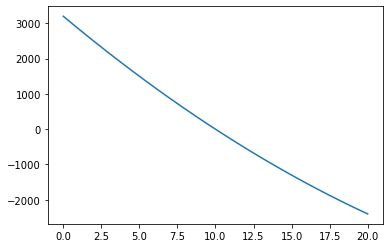

In [1746]:
plt.plot(x,f(x))

In [1684]:
 CSM_res_figure

,0,1,2


In [1702]:
SCR_response

0

In [1669]:
CSP_res_figure.index = range(CSP_df.index.get_loc(CSP_fun[1])+1,len(CSP_res_figure)+1)
CSM_res_figure.index = range(CSM_df.index.get_loc(CSM_fun[1])+1,len(CSM_res_figure)+1)

KeyError: 10847

In [1671]:
CSP_fun[1]

10847

In [1672]:
CSP_df.index

RangeIndex(start=1, stop=102, step=1)

In [1675]:
    # load data
    global df
    df = pd.read_csv(file_path, delimiter="\t", header=None)
    #CS Response
    ##CS+
    CSP_fun = SCR_resp(rise_begin,rise_end,max_rise_time,2,target,display_window)
    CSP_response = round(CSP_fun[0],4)
    global CSP_df
    CSP_df = df[(df[0]>= place_SCR) & (df[0]<= place_SCR+display_window)]
    CSP_res_figure = CSP_df.loc[CSP_fun[1]:CSP_fun[2]]
    ##CS-
    CSM_fun = SCR_resp(rise_begin,rise_end,max_rise_time,1,target,display_window)
    CSM_response = round(CSM_fun[0],4)
    global CSM_df
    CSM_df = df[(df[0]>= place_SCR) & (df[0]<= place_SCR+display_window)]
    CSM_res_figure = CSM_df.loc[CSP_fun[1]:CSP_fun[2]]
    #Reward Calculate
    diff = round(CSP_response - CSM_response,4)
    reward = round(300 - 100*diff)
    
    # figure
    ##reset index
    CSP_res_figure.index = range(CSP_df.index.get_loc(CSP_fun[1])+1,len(CSP_res_figure)+1)
    CSM_res_figure.index = range(CSM_df.index.get_loc(CSM_fun[1])+1,len(CSM_res_figure)+1)
    CSP_df.index = range(1,len(CSP_df)+1)
    CSM_df.index = range(1,len(CSM_df)+1)
    ##Find y-axis
    global min_y_ax1_ax2
    global max_y_ax1_ax2
    min_y_ax1_ax2 = min(min(CSP_df[1]),min(CSM_df[1])) - 0.5
    max_y_ax1_ax2 = max(max(CSP_df[1]),max(CSM_df[1])) + 0.5
    global min_y_ax3
    global max_y_ax3
    min_y_ax3 = min(CSP_df[1]-CSM_df[1]) - 0.5
    max_y_ax3 = max(CSP_df[1]-CSM_df[1]) + 0.5
    ##graw graph
    figure.clear()
    ax1 = figure.add_subplot(121)
    ax3 = figure.add_subplot(122)
    ax1.set_ylim(min_y_ax1_ax2, max_y_ax1_ax2)
    ax3.set_ylim(min_y_ax3, max_y_ax3)
    ax1.plot(CSP_df[1],label = "CS+")
    ax1.plot(CSP_res_figure[1])
    ax1.plot(CSM_df[1],label = "CS-")
    ax1.plot(CSM_res_figure[1])
    ax1.set_title("CS+ & CS-")
    ax1.legend()
    ax3.plot((CSP_df[1] - CSM_df[1]))
    ax3.set_title("Difference")
    plt.tight_layout()
    canvas.draw()

ValueError: Length mismatch: Expected axis has 24 elements, new values have 1 elements

In [1680]:
 CSP_res_figure.index = range(CSP_df.index.get_loc(CSP_fun[1])+1,CSP_df.index.get_loc(CSP_fun[1])+len(CSP_res_figure)+1)

In [1677]:
CSP_df.index.get_loc(CSP_fun[1])+1

24

In [1678]:
len(CSP_res_figure)+1

25

In [1611]:
CSP_fun = SCR_resp(rise_begin,rise_end,max_rise_time,1,target,display_window)

In [1716]:
CSP_df.iloc[0]

0    892.1500
1      6.2579
2      2.0000
Name: 1, dtype: float64

In [1616]:
    CSP_fun = SCR_resp(rise_begin,rise_end,max_rise_time,2,target,display_window)
    CSP_response = round(CSP_fun[0],4)
    global CSP_df
    CSP_df = df[(df[0]>= place_SCR) & (df[0]<= place_SCR+display_window)]
    CSP_res_figure = CSP_df.loc[CSP_fun[1]:CSP_fun[2]]

In [1643]:
CSP_res_figure = CSP_df.loc[CSP_fun[1]:CSP_fun[2]]
print(CSP_res_figure)

            0       1    2
10847  1084.7  5.6334  0.0
10848  1084.8  5.6350  0.0
10849  1084.9  5.6388  0.0
10850  1085.0  5.6451  0.0
10851  1085.1  5.6540  0.0
10852  1085.2  5.6648  0.0
10853  1085.3  5.6776  0.0
10854  1085.4  5.6922  0.0
10855  1085.5  5.7081  0.0
10856  1085.6  5.7245  0.0
10857  1085.7  5.7408  0.0
10858  1085.8  5.7566  0.0
10859  1085.9  5.7722  0.0
10860  1086.0  5.7873  0.0
10861  1086.1  5.8011  0.0
10862  1086.2  5.8119  0.0
10863  1086.3  5.8205  0.0
10864  1086.4  5.8277  9.0
10865  1086.5  5.8343  0.0
10866  1086.6  5.8397  0.0
10867  1086.7  5.8448  0.0
10868  1086.8  5.8489  0.0
10869  1086.9  5.8520  0.0
10870  1087.0  5.8533  0.0


In [1656]:
CSP_df[CSP_df[1] == CSP_res_figure.iloc[0][1]]

<bound method Index.get_loc of Int64Index([10847], dtype='int64')>

In [1660]:
CSP_res_figure.iloc[0].name

10847

In [1665]:
CSP_df.index.get_loc(CSP_res_figure.iloc[0].name)+1

24

In [1666]:
len(CSP_res_figure)

24

In [1630]:
CSP_res_figure.iloc[0][0] == CSM_df.iloc[0]

0    False
1    False
2    False
Name: 1, dtype: bool

In [1631]:
CSM_df.iloc[0]

0    1064.5000
1       5.6561
2       1.0000
Name: 1, dtype: float64

In [1622]:
CSP_df

,0,1,2
10824,1082.4,5.7061,2.0
10825,1082.5,5.7025,0.0
10826,1082.6,5.6988,0.0
10827,1082.7,5.6946,0.0
10828,1082.8,5.6901,0.0
...,...,...,...
10920,1092.0,5.6237,0.0
10921,1092.1,5.6209,0.0
10922,1092.2,5.6182,0.0
10923,1092.3,5.6153,0.0


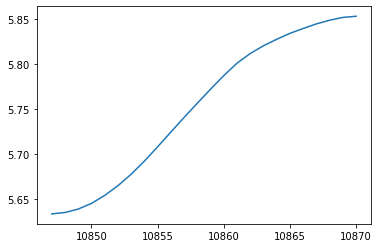

In [1621]:
plt.plot(CSP_res_figure[1])

In [1613]:
SCR_resp(rise_begin,rise_end,max_rise_time,1,target,display_window)

(0.1504999999999992, 10656, 10681)

In [1615]:
CSP_df

,0,1,2
1,1082.4,5.7061,2.0
2,1082.5,5.7025,0.0
3,1082.6,5.6988,0.0
4,1082.7,5.6946,0.0
5,1082.8,5.6901,0.0
...,...,...,...
97,1092.0,5.6237,0.0
98,1092.1,5.6209,0.0
99,1092.2,5.6182,0.0
100,1092.3,5.6153,0.0


In [1614]:
CSP_df.loc[CSP_fun[1]:CSP_fun[2]]

,0,1,2


In [1608]:
SCR_peaksiloc[0]
    

6.1674

In [1603]:
find_peaks(-SCR_start[1])

(array([3], dtype=int64), {})

In [1602]:
trough_index[0]

2

In [1599]:
SCR_peaks[1].iloc[0]

6.1674

In [1597]:
SCR_peaks.iloc[peak_index[0]].name

9156

In [1593]:
min_index = SCR_start[1].idxmin()

In [1594]:
min_index


9151

In [1591]:
CSP_df.index = range(1,len(CSP_df)+1)

In [1592]:
CSP_df[1].idxmin()

16

In [1589]:
CSP_df[1].idxmin()

20

In [1578]:
def myfun(x,y):
    return[x**2,y**2]

In [1583]:
myfun(1,2)[0]

1

In [1530]:
def find_inflection(data):
    inflection_points = list()
    diff_data = np.diff(data[1])
    diff2_data = np.diff(data[1],n=2)
    diff3_data = np.diff(data[1],n=3)
    for i in range(0, len(data[1]) - 2):
        if (diff2_data[i] < 0+10**(-5)) & (diff2_data[i] > 0-10**(-5)):
            if (diff3_data[i-1] < 0) &  (diff_data[i+1] < 0.05):
                inflection_points.append(i+2)
    return(inflection_points)

In [1512]:
def trough_peak(SCR_start,SCR_window) :
    trough_index = find_peaks(-SCR_start[1])[0]
    response_list = []
    global SCR_peaks
    if len(trough_index) == 0 :
        warning_min += 1
        min_index = SCR_start[1].idxmin()
        SCR_peaks = SCR_window.loc[min_index:min_index + int(max_rise_time/0.1)]
        peak_index = find_peaks(SCR_peaks[1])[0]
        if len(peak_index) == 0 :
            warning_max += 1
            SCR_max = SCR_peaks.max()
            SCR_min = SCR_peaks[1].iloc[0]
            SCR_response = SCR_max - SCR_min
        else:
            SCR_max = SCR_peaks.iloc[peak_index[0]][1]
            SCR_min = SCR_peaks[1].iloc[0]
            SCR_response = SCR_max - SCR_min
    else:
        for i in range(len(trough_index)):
            min_index = trough_index[i]
            SCR_peaks = SCR_window[min_index:min_index + int(max_rise_time/0.1)+1]
            peak_index = find_peaks(SCR_peaks[1])[0]
            if len(peak_index) == 0:
                warning_max += 1
                SCR_max = SCR_peaks.max()
                SCR_min = SCR_peaks[1].iloc[0]
                SCR_response = SCR_max - SCR_min
                response_list.append(SCR_response)
            else:
                SCR_max = SCR_peaks.iloc[peak_index[0]][1]
                SCR_min = SCR_peaks[1].iloc[0]
                SCR_response = SCR_max - SCR_min
                response_list.append(SCR_response)
        SCR_response = max(response_list)
    return(SCR_response)

In [1312]:
def SCR_resp(rise_begin, rise_end, max_rise_time, situation, target,display_window):
    warning_min = 0
    warning_max = 0
    global place_SCR
    global SCR_start
    place_SCR = df.loc[df[2] == situation].iloc[-target][0]
    # Estimate CS Response
    SCR_start = df[(df[0] >= place_SCR + rise_begin) & (df[0] <= place_SCR + rise_end)]
    SCR_window = df[(df[0]>= place_SCR + rise_begin) & (df[0]<= place_SCR+display_window-rise_begin)]
    trough_index = find_peaks(-SCR_start[1])[0]
    response_list = []
    global SCR_peaks
    if len(trough_index) == 0 :
        warning_min += 1
        min_index = SCR_start[1].idxmin()
        SCR_peaks = SCR_window.loc[min_index:min_index + int(max_rise_time/0.1)]
        peak_index = find_peaks(SCR_peaks[1])[0]
        if len(peak_index) == 0 :
            warning_max += 1
            SCR_max = SCR_peaks.max()
            SCR_min = SCR_peaks[1].iloc[0]
            SCR_response = SCR_max - SCR_min
        else:
            SCR_max = SCR_peaks.iloc[peak_index[0]][1]
            SCR_min = SCR_peaks[1].iloc[0]
            SCR_response = SCR_max - SCR_min
    else:
        for i in range(len(trough_index)):
            min_index = trough_index[i]
            SCR_peaks = SCR_window[min_index:min_index + int(max_rise_time/0.1)+1]
            peak_index = find_peaks(SCR_peaks[1])[0]
            if len(peak_index) == 0:
                warning_max += 1
                SCR_max = SCR_peaks.max()
                SCR_min = SCR_peaks[1].iloc[0]
                SCR_response = SCR_max - SCR_min
                response_list.append(SCR_response)
            else:
                SCR_max = SCR_peaks.iloc[peak_index[0]][1]
                SCR_min = SCR_peaks[1].iloc[0]
                SCR_response = SCR_max - SCR_min
                response_list.append(SCR_response)
        SCR_response = max(response_list)
    if SCR_response < 0 :
        SCR_response = 0
    return(SCR_response)

In [ ]:
SCR_res_figure = SCR_window.loc[SCR_peaks.iloc[0].name:SCR_peaks.iloc[peak_index[0]].name]

In [1534]:
 SCR_start = df[(df[0] >= place_SCR + rise_begin) & (df[0] <= place_SCR + rise_end)]

In [1537]:
SCR_start.iloc[find_inflection(SCR_start)]

,0,1,2
9721,972.15,6.2493,0.0


In [1541]:
SCR_start.loc[9721][0] - 969.35 + 0.5

3.2999999999999545

In [1538]:
find_inflection(SCR_start)

[28]

In [1529]:
SCR_start

,0,1,2
8060,806.05,6.3447,2.0
8061,806.15,6.3431,0.0
8062,806.25,6.3423,0.0
8063,806.35,6.3424,0.0
8064,806.45,6.3435,0.0
8065,806.55,6.3451,0.0
8066,806.65,6.3481,0.0
8067,806.75,6.3521,0.0
8068,806.85,6.3568,0.0
8069,806.95,6.3617,0.0


In [1368]:
for i in range(1,20):
    print(i,SCR_resp(rise_begin, rise_end, max_rise_time, situation, 20-i,display_window))

1 0
2 0.9695
3 0.30909999999999904
4 0.35279999999999934
5 0.5544999999999991
6 0.4531999999999998
7 0.5595999999999997
8 0.4679000000000002
9 0.4485999999999999
10 0.4005000000000001
11 0.5150000000000006
12 0.4720000000000004
13 0.42469999999999963
14 0.48329999999999984
15 0.2968000000000002
16 0.40580000000000016
17 0.48080000000000034
18 0.5607000000000006
19 0.21989999999999998


In [1371]:
SCR_resp(rise_begin, rise_end, max_rise_time, situation, 20-2,display_window)

0.9695

0.5150000000000006


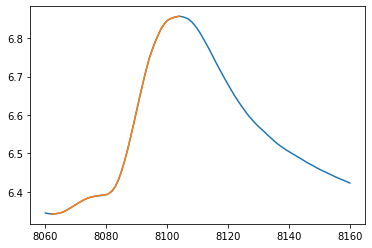

In [1554]:
    warning_min = 0
    warning_max = 0
    situation = 2
    target = 20-11
    display_window = 10
    global place_SCR
    global SCR_start
    place_SCR = df.loc[df[2] == situation].iloc[-target][0]
    # Estimate CS Response
    SCR_start = df[(df[0] >= place_SCR + rise_begin) & (df[0] <= place_SCR + rise_end)]
    SCR_window = df[(df[0]>= place_SCR + rise_begin) & (df[0]<= place_SCR+display_window-rise_begin)]
    trough_index = find_peaks(-SCR_start[1])[0]
    response_list = []
    global SCR_peaks
    if len(trough_index) == 0 :
        warning_min += 1
        min_index = SCR_start[1].idxmin()
        SCR_peaks = SCR_window.loc[min_index:min_index + int(max_rise_time/0.1)]
        SCR_max = SCR_peaks.iloc[find_peaks(SCR_peaks[1])[0][0]][1]
        SCR_min = SCR_peaks[1].iloc[0]
        SCR_response = SCR_max - SCR_min
    else:
        for i in range(len(trough_index)):
            min_index = trough_index[i]
            SCR_peaks = SCR_window[min_index:min_index + int(max_rise_time/0.1)+1]
            peak_index = find_peaks(SCR_peaks[1])[0]
            if len(peak_index) == 0:
                warning_max += 1
                SCR_max = SCR_peaks.max()
                SCR_min = SCR_peaks[1].iloc[0]
                SCR_response = SCR_max - SCR_min
                response_list.append(SCR_response)
            else:
                SCR_max = SCR_peaks.iloc[peak_index[0]][1]
                SCR_min = SCR_peaks[1].iloc[0]
                SCR_response = SCR_max - SCR_min
                response_list.append(SCR_response)
                SCR_res_figure = SCR_start.loc[SCR_peaks.iloc[0].name:SCR_peaks.iloc[peak_index[0]].name]
        SCR_response = max(response_list)
    if SCR_response < 0 :
        SCR_response = 0
    print(SCR_response)
    plt.plot(SCR_window[1])
    plt.plot(SCR_res_figure[1])

In [1561]:
from scipy.signal import find_peaks_cwt

In [1567]:
find_peaks(SCR_start[1])

(array([44], dtype=int64), {})

In [1555]:
d1 = np.diff(SCR_start[1])

In [1556]:
d1

array([-1.60e-03, -8.00e-04,  1.00e-04,  1.10e-03,  1.60e-03,  3.00e-03,
        4.00e-03,  4.70e-03,  4.90e-03,  4.90e-03,  5.00e-03,  4.50e-03,
        4.10e-03,  3.60e-03,  2.30e-03,  1.80e-03,  1.20e-03,  1.20e-03,
        9.00e-04,  1.20e-03,  3.70e-03,  6.90e-03,  1.13e-02,  1.69e-02,
        2.23e-02,  2.64e-02,  2.98e-02,  3.30e-02,  3.44e-02,  3.57e-02,
        3.50e-02,  3.41e-02,  3.29e-02,  2.93e-02,  2.39e-02,  2.13e-02,
        1.84e-02,  1.71e-02,  1.20e-02,  9.20e-03,  4.70e-03,  3.10e-03,
        2.10e-03,  1.40e-03, -1.30e-03])

In [1549]:
d1[15]

0.0030000000000001137

In [1552]:
SCR_start.iloc[16]

0    893.7500
1      6.3879
2      0.0000
Name: 8937, dtype: float64

In [1553]:
SCR_start

,0,1,2
8921,892.15,6.2579,2.0
8922,892.25,6.2703,0.0
8923,892.35,6.2816,0.0
8924,892.45,6.2924,0.0
8925,892.55,6.3022,0.0
8926,892.65,6.3118,0.0
8927,892.75,6.3204,0.0
8928,892.85,6.3289,0.0
8929,892.95,6.3372,0.0
8930,893.05,6.3449,0.0


In [1523]:
def find_inflection(data):
    inflection_points = list()
    diff_data = np.diff(data[1])
    diff2_data = np.diff(data[1],n=2)
    diff3_data = np.diff(data[1],n=3)
    for i in range(0, len(data[1]) - 2):
        if (diff2_data[i] < 0+10**(-5)) & (diff2_data[i] > 0-10**(-5)):
            if (diff3_data[i-1] > 0) &  (diff_data[i+1] < 0.05):
                inflection_points.append(i+2)
    return(inflection_points)
    

In [ ]:
f

In [1510]:
def trough_peak(SCR_start,SCR_window) :
    response_list = []
    global SCR_peaks
    if len(trough_index) == 0 :
        warning_min += 1
        min_index = SCR_start[1].idxmin()
        SCR_peaks = SCR_window.loc[min_index:min_index + int(max_rise_time/0.1)]
        SCR_max = SCR_peaks.iloc[find_peaks(SCR_peaks[1])[0][0]][1]
        SCR_min = SCR_peaks[1].iloc[0]
        SCR_response = SCR_max - SCR_min
    else:
        for i in range(len(trough_index)):
            min_index = trough_index[i]
            SCR_peaks = SCR_window[min_index:min_index + int(max_rise_time/0.1)+1]
            peak_index = find_peaks(SCR_peaks[1])[0]
            if len(peak_index) == 0:
                warning_max += 1
                SCR_max = SCR_peaks.max()
                SCR_min = SCR_peaks[1].iloc[0]
                SCR_response = SCR_max - SCR_min
                response_list.append(SCR_response)
            else:
                SCR_max = SCR_peaks.iloc[peak_index[0]][1]
                SCR_min = SCR_peaks[1].iloc[0]
                SCR_response = SCR_max - SCR_min
                response_list.append(SCR_response)
        SCR_response = max(response_list)
    return(SCR_response)

In [1494]:
inflectionArray = np.zeros(len(data))
magnitudeArray = np.zeros(len(data))
slopeArray = np.zeros(len(data))
d1 = np.gradient(data[1])
d2 = np.gradient(d1)
for i in range(len(data)-1):
    if (d2[i] <0 and d2[i+1]>0) or (d2[i] >0 and d2[i+1]):
        inflectionArray[i] = 1
        magnitudeArray[i] = d2[i] - d2[i+1]
        slopeArray[i] = d1[i]
        print(i,1)
        if (magnitudeArray[i-1] >0) and (magnitudeArray[i]<0) and (magnitudeArray[i+1]>0):
            print(i,2)
            if slopeArray[i] > 0.05:
                inflectionArray[i] = 0
                print(i)


0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
18 1
19 1
20 1
21 1
22 1
23 1
24 1
25 1
26 1
27 1
28 1
29 1


In [1483]:
inflectionArray

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

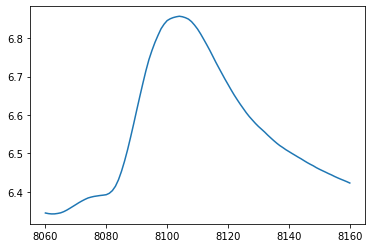

In [1452]:
plt.plot(SCR_window[1])

In [1442]:
SCR_peaks.iloc[0].name

8062

In [1431]:
SCR_peaks

,0,1,2
8062,806.25,6.3423,0.0
8063,806.35,6.3424,0.0
8064,806.45,6.3435,0.0
8065,806.55,6.3451,0.0
8066,806.65,6.3481,0.0
8067,806.75,6.3521,0.0
8068,806.85,6.3568,0.0
8069,806.95,6.3617,0.0
8070,807.05,6.3666,0.0
8071,807.15,6.3716,0.0


In [1447]:
SCR_start.loc[SCR_peaks.iloc[0].name:SCR_peaks.iloc[peak_index[0]].name]

,0,1,2
8062,806.25,6.3423,0.0
8063,806.35,6.3424,0.0
8064,806.45,6.3435,0.0
8065,806.55,6.3451,0.0
8066,806.65,6.3481,0.0
8067,806.75,6.3521,0.0
8068,806.85,6.3568,0.0
8069,806.95,6.3617,0.0
8070,807.05,6.3666,0.0
8071,807.15,6.3716,0.0


In [1441]:
SCR_peaks.iloc[peak_index[0]].name

8104

In [1425]:
peak_index

array([42], dtype=int64)

In [1349]:
 trough_index

array([2], dtype=int64)

In [1341]:
SCR_window[SCR_window[1] == SCR_min].index

Int64Index([8062], dtype='int64')

In [1397]:
SCR_maxmin = SCR_window.loc[8062:8104]

In [1390]:
SCR_window.iloc[44]

0    810.4500
1      6.8573
2      0.0000
Name: 8104, dtype: float64

In [1391]:
SCR_maxmin[1]

8062    6.3423
8063    6.3424
8064    6.3435
8065    6.3451
8066    6.3481
8067    6.3521
8068    6.3568
8069    6.3617
8070    6.3666
8071    6.3716
8072    6.3761
8073    6.3802
8074    6.3838
8075    6.3861
8076    6.3879
8077    6.3891
8078    6.3903
8079    6.3912
8080    6.3924
8081    6.3961
8082    6.4030
8083    6.4143
8084    6.4312
8085    6.4535
8086    6.4799
8087    6.5097
8088    6.5427
8089    6.5771
8090    6.6128
8091    6.6478
8092    6.6819
8093    6.7148
8094    6.7441
8095    6.7680
8096    6.7893
8097    6.8077
8098    6.8248
8099    6.8368
8100    6.8460
8101    6.8507
8102    6.8538
8103    6.8559
8104    6.8573
Name: 1, dtype: float64

In [1392]:
find_peaks(-SCR_maxmin[1])

(array([], dtype=int64), {})

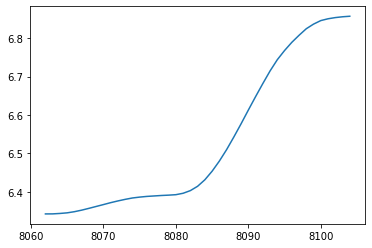

In [1393]:
plt.plot(SCR_maxmin[1])

In [1323]:
trough_index

array([2], dtype=int64)

In [1302]:
SCR_peaks

,0,1,2
200,20.049,7.6465,0.0
201,20.149,7.6430,0.0
202,20.249,7.6402,0.0
203,20.349,7.6370,0.0
204,20.449,7.6339,0.0
205,20.549,7.6311,0.0
206,20.649,7.6280,0.0
207,20.749,7.6252,0.0
208,20.849,7.6223,0.0
209,20.949,7.6198,0.0


In [1394]:
SCR_start[1].idxmin()

8062

In [1395]:
find_peaks(-SCR_start[1])[0]

array([2], dtype=int64)

In [1419]:
SCR_maxmina = SCR_window.loc[8078:8104]

In [1292]:
    place_SCR = df.loc[df[2] == 2].iloc[-1][0]
    # Estimate CS Response
    SCR_start = df[(df[0] >= place_SCR + rise_begin) & (df[0] <= place_SCR + rise_end)]
    SCR_window = df[(df[0]>= place_SCR+ rise_begin) & (df[0]<= place_SCR+display_window)]
    trough_index = find_peaks(-SCR_start[1])[0]
    response_list = []
    for i in range(len(trough_index)):
        global SCR_peaks
        min_index = trough_index[i]
        SCR_peaks = SCR_window[min_index:min_index + int(max_rise_time/0.1)+1]
        SCR_max = SCR_peaks.iloc[find_peaks(SCR_peaks[1])[0][0]][1]
        SCR_min = SCR_peaks[1].iloc[0]
        SCR_response = SCR_max - SCR_min
        response_list.append(SCR_response)
    SCR_response = max(response_list)


In [1289]:
SCR_resp(rise_begin, rise_end, max_rise_time, 2, 19,display_window)

-0.08359999999999967

In [1405]:
SCR_window

,0,1,2
8060,806.05,6.3447,2.0
8061,806.15,6.3431,0.0
8062,806.25,6.3423,0.0
8063,806.35,6.3424,0.0
8064,806.45,6.3435,0.0
...,...,...,...
8156,815.65,6.4363,0.0
8157,815.75,6.4329,0.0
8158,815.85,6.4297,0.0
8159,815.95,6.4264,0.0


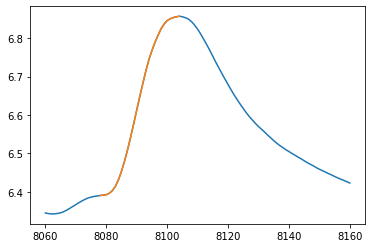

In [1420]:
plt.plot(SCR_window[1])
plt.plot(SCR_maxmina[1])


In [1508]:
SCR_max - SCR_maxmina[1].iloc[0]

0.4670000000000005

In [1282]:
find_peaks(SCR_peaks[1])

(array([ 7, 38], dtype=int64), {})

In [1283]:
SCR_peaks.max()

0    141.2500
1      9.9729
2      9.0000
dtype: float64

In [1498]:
def find_inflection(data):
    inflection_points = list()
    diff_data = np.diff(data[1])
    diff2_data = np.diff(data[1],n=2)
    diff3_data = np.diff(data[1],n=3)
    for i in range(0, len(data[1]) - 2):
        if (diff2_data[i] < 0+10**(-5)) & (diff2_data[i] > 0-10**(-5)):
            if (diff3_data[i-1] < 0+10*(-3)) &  (diff_data[i+1] < 0.05):
                inflection_points.append(i+2)
    return(inflection_points)

In [1499]:
data = SCRminmax = SCR_window.loc[8065:8065+51]

In [1520]:
data = SCR_start

In [1521]:
    inflection_points = list()
    diff_data = np.diff(data[1])
    diff2_data = np.diff(data[1],n=2)
    diff3_data = np.diff(data[1],n=3)
    for i in range(0, len(data[1]) - 2):
        if (diff2_data[i] < 0+10**(-5)) & (diff2_data[i] > 0-10**(-5)):
            if (diff3_data[i-1] > 0) &  (diff_data[i+1] < 0.05):
                inflection_points.append(i+2)
    print(inflection_points)

[18]


In [1402]:
SCR_window[SCR_window[1] == 6.3666]

,0,1,2
8070,807.05,6.3666,0.0


In [1501]:
data.iloc[13]

0    807.8500
1      6.3903
2      0.0000
Name: 8078, dtype: float64

In [1504]:
find_peaks(-SCR_window.loc[8078:8065+51][1])

(array([], dtype=int64), {})

In [1421]:
SCR_max-6.3903

0.4670000000000005

In [1399]:
data.iloc[5]

0    807.0500
1      6.3666
2      0.0000
Name: 8070, dtype: float64

In [1400]:
SCR_max - 6.3666

0.49070000000000036

In [1225]:
SCR_window

,0,1,2
8065,806.55,6.3451,0.0
8066,806.65,6.3481,0.0
8067,806.75,6.3521,0.0
8068,806.85,6.3568,0.0
8069,806.95,6.3617,0.0
...,...,...,...
8151,815.15,6.4550,0.0
8152,815.25,6.4513,0.0
8153,815.35,6.4474,0.0
8154,815.45,6.4439,0.0


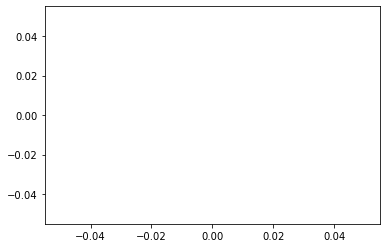

In [1219]:
plt.plot(SCR_peaks[1])

In [1206]:
for i in range(1,11):
    SCR_resp(rise_begin, rise_end, max_rise_time, 2, i,display_window)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
min_index = SCR_res[1].idxmin()
        SCR_rise = df[df.index >= min_index]
        SCR_max = SCR_rise[SCR_rise[0] <= SCR_rise[0].iloc[0] + max_rise_time][1].max()
        SCR_response = SCR_max - min(SCR_res[1])

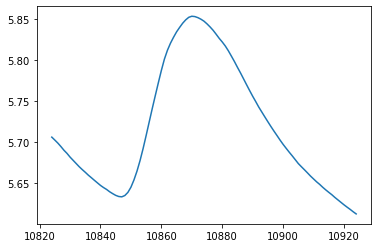

In [1173]:
plt.plot(SCR_window[1])

In [1189]:
trough_index

array([18], dtype=int64)

In [1190]:
SCR_start.iloc[18]

0    1084.7000
1       5.6334
2       0.0000
Name: 10847, dtype: float64

In [1195]:
SCR_window[min_index:min_index + int(max_rise_time/0.1)]

,0,1,2
10842,1084.2,5.6424,0.0
10843,1084.3,5.6396,0.0
10844,1084.4,5.6373,0.0
10845,1084.5,5.6352,0.0
10846,1084.6,5.6338,0.0
10847,1084.7,5.6334,0.0
10848,1084.8,5.6350,0.0
10849,1084.9,5.6388,0.0
10850,1085.0,5.6451,0.0
10851,1085.1,5.6540,0.0


In [1171]:
find_peaks(SCR_peaks[1])

(array([28], dtype=int64), {})

In [1175]:
SCR_window[min_index:min_index + int(max_rise_time/0.1)+1]

,0,1,2
10842,1084.2,5.6424,0.0
10843,1084.3,5.6396,0.0
10844,1084.4,5.6373,0.0
10845,1084.5,5.6352,0.0
10846,1084.6,5.6338,0.0
10847,1084.7,5.6334,0.0
10848,1084.8,5.6350,0.0
10849,1084.9,5.6388,0.0
10850,1085.0,5.6451,0.0
10851,1085.1,5.6540,0.0


In [1187]:
max(SCR_window[min_index:min_index + int(max_rise_time/0.1)+1][1]) 

5.8533

In [1179]:
SCR_min

5.6424

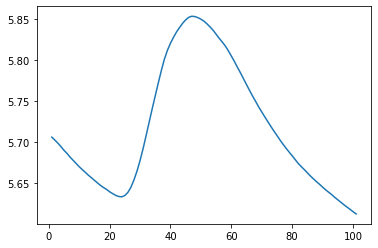

In [1182]:
plt.plot(CSP_df[1])

In [1192]:
df[(df[0] >= place_SCR ) & (df[0] <= place_SCR + rise_end)][1].min()

5.6334

In [1169]:
trough_index

array([18], dtype=int64)

In [1199]:
SCR_response

0.21989999999999998

In [1200]:
SCR_resp(rise_begin, rise_end, max_rise_time, 2, 1,display_window)

0.21989999999999998

In [1135]:
place_SCR = df.loc[df[2] == 2].iloc[-1][0]

In [1143]:
trough_index = find_peaks(-SCR_start[1])[0]

In [1144]:
print(trough_index)

[18]


In [1145]:
min_index = trough_index[i]
print(min_index)

18


In [1151]:
 SCR_start[min_index:min_index + int(max_rise_time/0.1)+1]

,0,1,2
10847,1084.7,5.6334,0.0
10848,1084.8,5.6350,0.0
10849,1084.9,5.6388,0.0
10850,1085.0,5.6451,0.0
10851,1085.1,5.6540,0.0
10852,1085.2,5.6648,0.0
10853,1085.3,5.6776,0.0
10854,1085.4,5.6922,0.0
10855,1085.5,5.7081,0.0
10856,1085.6,5.7245,0.0


In [1153]:
SCR_peaks = SCR_start[min_index:min_index + int(max_rise_time/0.1)+1]
print(SCR_peaks)

            0       1    2
10847  1084.7  5.6334  0.0
10848  1084.8  5.6350  0.0
10849  1084.9  5.6388  0.0
10850  1085.0  5.6451  0.0
10851  1085.1  5.6540  0.0
10852  1085.2  5.6648  0.0
10853  1085.3  5.6776  0.0
10854  1085.4  5.6922  0.0
10855  1085.5  5.7081  0.0
10856  1085.6  5.7245  0.0
10857  1085.7  5.7408  0.0
10858  1085.8  5.7566  0.0
10859  1085.9  5.7722  0.0
10860  1086.0  5.7873  0.0
10861  1086.1  5.8011  0.0
10862  1086.2  5.8119  0.0
10863  1086.3  5.8205  0.0
10864  1086.4  5.8277  9.0
10865  1086.5  5.8343  0.0
10866  1086.6  5.8397  0.0
10867  1086.7  5.8448  0.0
10868  1086.8  5.8489  0.0
10869  1086.9  5.8520  0.0


In [1147]:
min_index + int(max_rise_time/0.1)+1

69

In [1136]:
SCR_start = df[(df[0] >= place_SCR + rise_begin) & (df[0] <= place_SCR + rise_end)]

In [1131]:
min_index

10656

In [1163]:
SCR_start[min_index:]

,0,1,2
10847,1084.7,5.6334,0.0
10848,1084.8,5.6350,0.0
10849,1084.9,5.6388,0.0
10850,1085.0,5.6451,0.0
10851,1085.1,5.6540,0.0
10852,1085.2,5.6648,0.0
10853,1085.3,5.6776,0.0
10854,1085.4,5.6922,0.0
10855,1085.5,5.7081,0.0
10856,1085.6,5.7245,0.0


In [1158]:
min_index + int(5/0.1+1)

69

In [1155]:
5/0.1+1

51.0

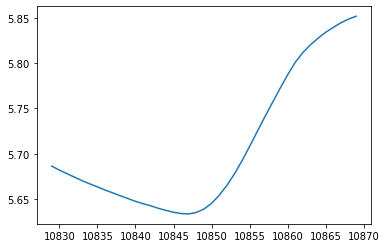

In [1126]:
plt.plot(SCR_start[1])

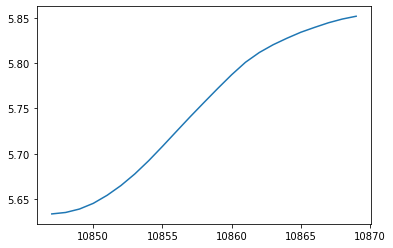

In [1150]:
plt.plot(SCR_peaks[1])

In [1108]:
SCR_peaks[1].iloc[0]

5.6334

In [1090]:
SCR_peaks.iloc[find_peaks(SCR_peaks[1])[0][0]][1]

7.9786

In [1105]:
SCR_peaks[1].min()

5.6334

In [964]:
min_index = SCR_res[1].idxmin()

In [982]:
from scipy.signal import find_peaks

In [983]:
my_list = [1,2,3,4,5,2,3,4,1,2,3]

In [1048]:
find_peaks(-SCR_res[1])[0]

array([2], dtype=int64)

In [1034]:
SCR_res.iloc[18]

0    876.7500
1      6.3232
2      0.0000
Name: 8767, dtype: float64

In [1059]:
CSP_df[:int(5/0.1)+1]

,0,1,2
1,892.15,6.2579,2.0
2,892.25,6.2703,0.0
3,892.35,6.2816,0.0
4,892.45,6.2924,0.0
5,892.55,6.3022,0.0
6,892.65,6.3118,0.0
7,892.75,6.3204,0.0
8,892.85,6.3289,0.0
9,892.95,6.3372,0.0
10,893.05,6.3449,0.0


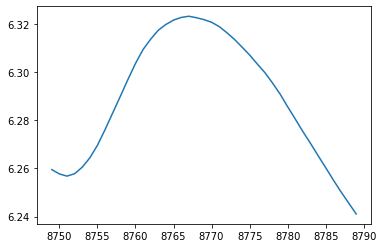

In [993]:
plt.plot(SCR_res[1])

In [1042]:
max(SCR_res[1])

6.3232

In [995]:
find_peaks(CSP_df[1])

(array([17, 42, 44], dtype=int64), {})

In [999]:
find_peaks(-CSP_df[1])

(array([21, 43], dtype=int64), {})

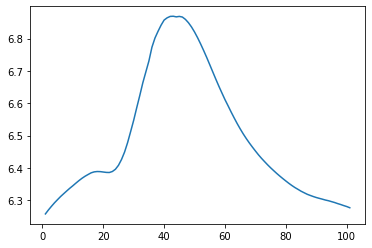

In [994]:
plt.plot(CSP_df[1])

In [991]:
SCR_res[18:][1]

8767    6.3232
8768    6.3226
8769    6.3218
8770    6.3207
8771    6.3189
8772    6.3164
8773    6.3136
8774    6.3104
8775    6.3071
8776    6.3034
8777    6.2998
8778    6.2955
8779    6.2909
8780    6.2856
8781    6.2805
8782    6.2753
8783    6.2704
8784    6.2653
8785    6.2603
8786    6.2552
8787    6.2503
8788    6.2457
8789    6.2411
Name: 1, dtype: float64

In [986]:
SCR_res

,0,1,2
8749,874.95,6.2595,0.0
8750,875.05,6.2577,0.0
8751,875.15,6.2568,0.0
8752,875.25,6.2578,0.0
8753,875.35,6.2605,0.0
8754,875.45,6.2644,0.0
8755,875.55,6.2696,0.0
8756,875.65,6.2761,0.0
8757,875.75,6.2830,0.0
8758,875.85,6.2899,0.0


In [965]:
min_index

10656

In [967]:
SCR_res

,0,1,2
10650,1065.0,5.6441,0.0
10651,1065.1,5.6422,0.0
10652,1065.2,5.6398,0.0
10653,1065.3,5.6382,0.0
10654,1065.4,5.6369,0.0
10655,1065.5,5.6357,0.0
10656,1065.6,5.6355,0.0
10657,1065.7,5.6362,0.0
10658,1065.8,5.6383,0.0
10659,1065.9,5.6420,0.0


In [ ]:
 min_index = SCR_res[1].idxmin()
        SCR_rise = df[df.index >= min_index]
        SCR_max = SCR_rise[SCR_rise[0] <= SCR_rise[0].iloc[0] + max_rise_time][1].max()
        SCR_response = SCR_max - min(SCR_res[1])

In [ ]:
SCR_resp(rise_begin, rise_end, max_rise_time, situation, target):
    global place_SCR
    place_SCR = df.loc[df[2] == situation].iloc[-target][0]
    global SCR_res
    # Estimate CS Response
    SCR_res = df[(df[0] >= place_SCR + rise_begin) & (df[0] <= place_SCR + rise_end)]
    
    inflection_place = find_inflection(SCR_res)
    print(find_inflection(SCR_res))
    SCR_response_list = []

In [968]:
def find_inflection(data):
    inflection_points = list()
    diff_data = np.diff(data[1])
    diff2_data = np.diff(data[1],n=2)
    diff3_data = np.diff(data[1],n=3)
    for i in range(0, len(data[1]) - 2):
        if (diff2_data[i] < 0+10**(-5)) & (diff2_data[i] > 0-10**(-5)):
            if (diff3_data[i-1] < 0+10**(-3))& (diff_data[i-1]>0-10**(3)) &  (diff_data[i+1] < 0.05):
                inflection_points.append(i+2)
    return(inflection_points)

In [962]:
find_inflection(SCR_res)

[9, 40]

In [944]:
diff3_data = np.diff(SCR_res[1],n=3)

In [938]:
diff

,0,1,2
8749,874.95,6.2595,0.0
8750,875.05,6.2577,0.0
8751,875.15,6.2568,0.0
8752,875.25,6.2578,0.0
8753,875.35,6.2605,0.0
8754,875.45,6.2644,0.0
8755,875.55,6.2696,0.0
8756,875.65,6.2761,0.0
8757,875.75,6.2830,0.0
8758,875.85,6.2899,0.0


In [933]:
min(SCR_res[1])

6.2411

In [936]:
SCR_res

,0,1,2
8749,874.95,6.2595,0.0
8750,875.05,6.2577,0.0
8751,875.15,6.2568,0.0
8752,875.25,6.2578,0.0
8753,875.35,6.2605,0.0
8754,875.45,6.2644,0.0
8755,875.55,6.2696,0.0
8756,875.65,6.2761,0.0
8757,875.75,6.2830,0.0
8758,875.85,6.2899,0.0


In [872]:
test = df[(df[0] >= place_SCR) & (df[0] <= place_SCR + rise_end)]

In [873]:
test

,0,1,2
8921,892.15,6.2579,2.0
8922,892.25,6.2703,0.0
8923,892.35,6.2816,0.0
8924,892.45,6.2924,0.0
8925,892.55,6.3022,0.0
8926,892.65,6.3118,0.0
8927,892.75,6.3204,0.0
8928,892.85,6.3289,0.0
8929,892.95,6.3372,0.0
8930,893.05,6.3449,0.0


In [914]:
start_index = 15

In [911]:
len(SCR_res)

41

In [910]:
len(SCR_res.loc[start_index:])

41

In [915]:
SCR_res[start_index:start_index+5]

,0,1,2
9713,971.35,6.0849,0.0
9714,971.45,6.1034,0.0
9715,971.55,6.1236,0.0
9716,971.65,6.1461,0.0
9717,971.75,6.1672,0.0


In [917]:
SCR_temp = SCR_res[start_index:start_index+5]

In [918]:
SCR_temp[1].idxmin()

9713

In [919]:
SCR_rise = df[df.index >= min_index]

In [920]:
SCR_rise

,0,1,2
8065,806.55,6.3451,0.0
8066,806.65,6.3481,0.0
8067,806.75,6.3521,0.0
8068,806.85,6.3568,0.0
8069,806.95,6.3617,0.0
...,...,...,...
11036,1103.60,5.9426,0.0
11037,1103.70,5.9306,0.0
11038,1103.80,5.9103,0.0
11039,1103.90,5.8778,0.0


In [925]:
SCR_rise[0].iloc[0]

806.55

In [928]:
SCR_rise[SCR_rise[0] <= SCR_rise[0].iloc[0] + max_rise_time][1].max()

6.8573

In [ ]:
6.5873-

In [929]:
min(SCR_rise[1])

5.4954

In [ ]:
            start_index = inflection_index[i]
            SCR_temp = SCR_res[start_index:start_index+5]
            min_index = SCR_temp[1].idxmin()
            SCR_rise = df[df.index >= min_index]
            SCR_max = SCR_rise[SCR_rise[0] <= SCR_rise[0].iloc[0] + max_rise_time][1].max()
            SCR_response_list.append(SCR_max - min(SCR_rise[1]))
        SCR_response = max(SCR_response_list)

In [876]:
SCR_res

,0,1,2
8926,892.65,6.3118,0.0
8927,892.75,6.3204,0.0
8928,892.85,6.3289,0.0
8929,892.95,6.3372,0.0
8930,893.05,6.3449,0.0
8931,893.15,6.3530,0.0
8932,893.25,6.3608,0.0
8933,893.35,6.3680,0.0
8934,893.45,6.3743,0.0
8935,893.55,6.3797,0.0


In [884]:
CSP_df

,0,1,2
8921,892.15,6.2579,2.0
8922,892.25,6.2703,0.0
8923,892.35,6.2816,0.0
8924,892.45,6.2924,0.0
8925,892.55,6.3022,0.0
...,...,...,...
9017,901.75,6.2899,0.0
9018,901.85,6.2870,0.0
9019,901.95,6.2837,0.0
9020,902.05,6.2807,0.0


In [885]:
min(CSP_df[20:])

,0,1,2
8941,894.15,6.3863,0.0
8942,894.25,6.3860,0.0
8943,894.35,6.3891,0.0
8944,894.45,6.3960,0.0
8945,894.55,6.4082,0.0
...,...,...,...
9017,901.75,6.2899,0.0
9018,901.85,6.2870,0.0
9019,901.95,6.2837,0.0
9020,902.05,6.2807,0.0


In [886]:
test[20:]

,0,1,2
8941,894.15,6.3863,0.0
8942,894.25,6.3860,0.0
8943,894.35,6.3891,0.0
8944,894.45,6.3960,0.0
8945,894.55,6.4082,0.0
8946,894.65,6.4262,0.0
8947,894.75,6.4491,0.0
8948,894.85,6.4784,0.0
8949,894.95,6.5126,0.0
8950,895.05,6.5475,0.0


In [882]:
SCR_res[15:]

,0,1,2
8941,894.15,6.3863,0.0
8942,894.25,6.3860,0.0
8943,894.35,6.3891,0.0
8944,894.45,6.3960,0.0
8945,894.55,6.4082,0.0
8946,894.65,6.4262,0.0
8947,894.75,6.4491,0.0
8948,894.85,6.4784,0.0
8949,894.95,6.5126,0.0
8950,895.05,6.5475,0.0


In [832]:
for i in range(0, len(inflection_index)):
    start_index = inflection_index[i]
    SCR_temp = SCR_res.loc[start_index:]
    min_index = SCR_temp[1].idxmin()
    SCR_rise = df[df.index >= min_index]
    SCR_max = SCR_rise[SCR_rise[0] <= SCR_rise[0].iloc[0] + max_rise_time][1].max()
    SCR_response_list.append(SCR_max - min(SCR_res[1]))

In [890]:
SCR_res

,0,1,2
8926,892.65,6.3118,0.0
8927,892.75,6.3204,0.0
8928,892.85,6.3289,0.0
8929,892.95,6.3372,0.0
8930,893.05,6.3449,0.0
8931,893.15,6.3530,0.0
8932,893.25,6.3608,0.0
8933,893.35,6.3680,0.0
8934,893.45,6.3743,0.0
8935,893.55,6.3797,0.0


In [871]:
CSP_df

,0,1,2
8921,892.15,6.2579,2.0
8922,892.25,6.2703,0.0
8923,892.35,6.2816,0.0
8924,892.45,6.2924,0.0
8925,892.55,6.3022,0.0
...,...,...,...
9017,901.75,6.2899,0.0
9018,901.85,6.2870,0.0
9019,901.95,6.2837,0.0
9020,902.05,6.2807,0.0


In [843]:
SCR_res

,0,1,2
8749,874.95,6.2595,0.0
8750,875.05,6.2577,0.0
8751,875.15,6.2568,0.0
8752,875.25,6.2578,0.0
8753,875.35,6.2605,0.0
8754,875.45,6.2644,0.0
8755,875.55,6.2696,0.0
8756,875.65,6.2761,0.0
8757,875.75,6.2830,0.0
8758,875.85,6.2899,0.0


In [833]:
SCR_response_list

[]

In [ ]:
def SCR_resp(rise_begin, rise_end, max_rise_time, situation, target):
    global place_SCR
    place_SCR = df.loc[df[2] == situation].iloc[-target][0]
    global SCR_res
    # Estimate CS Response
    SCR_res = df[(df[0] >= place_SCR + rise_begin) & (df[0] <= place_SCR + rise_end)]
    
    inflection_place = find_inflection(SCR_res)
    print(find_inflection(SCR_res))
    SCR_response_list = []
    if len(inflection_place) == 0:
        min_index = SCR_res[1].idxmin()
        SCR_rise = df[df.index >= min_index]
        SCR_max = SCR_rise[SCR_rise[0] <= SCR_rise[0].iloc[0] + max_rise_time][1].max()
        SCR_response = SCR_max - min(SCR_res[1])
    else:
        inflection_index = find_inflection(SCR_res)
        for i in range(0, len(inflection_index)):
            start_index = inflection_index[i]
            SCR_temp = SCR_res.loc[start_index:]
            min_index = SCR_temp[1].idxmin()
            SCR_rise = df[df.index >= min_index]
            SCR_max = SCR_rise[SCR_rise[0] <= SCR_rise[0].iloc[0] + max_rise_time][1].max()
            SCR_response_list.append(SCR_max - min(SCR_res[1]))
        SCR_response = max(SCR_response_list)

In [818]:
def find_inflection(data):
    inflection_points = list()
    diff_data = np.diff(data[1])
    diff2_data = np.diff(data[1],n=2)
    diff3_data = np.diff(data[1],n=3)
    for i in range(0, len(data[1]) - 2):
        if (diff2_data[i] < 0+10**(-5)) & (diff2_data[i] > 0-10**(-5)):
            if (diff3_data[i-1] > 0) &  (diff_data[i+1] < 0.05):
                inflection_points.append(i+2)
    return(inflection_points)

In [819]:
find_inflection(CSP_df)

[20]

In [40]:
CSP_df[1].iloc[2008]

7.5918

In [45]:
diff=np.diff(CSP_df[1])

In [5]:
len(df[df[2]==1])

22

In [171]:
CSP_df

,0,1,2
1,892.15,6.2576,0.0
2,892.15,6.2577,0.0
3,892.15,6.2579,0.0
4,892.15,6.2582,0.0
5,892.15,6.2586,2.0
...,...,...,...
5001,902.15,6.2774,0.0
5002,902.15,6.2772,0.0
5003,902.15,6.2770,0.0
5004,902.15,6.2768,0.0


In [566]:
data = CSP_df[1]

In [658]:
data = CSP_df[1]

In [810]:
def SCR_resp(rise_begin,rise_end,max_rise_time,situation,target):
    global place_SCR
    place_SCR = df.loc[df[2]==situation].iloc[-target][0]
    #Estimate CS Response
    SCR_res = df[(df[0]>= place_SCR+rise_begin) & (df[0]<= place_SCR+rise_end)]
    SCR_response_list = list()
    inflection_place = find_inflection(SCR_res)
    if len(inflection_place) == 0:
        min_index = SCR_res[1].idxmin()
        SCR_rise = df[df.index >= min_index]
        SCR_max = SCR_rise[SCR_rise[0]<= SCR_rise[0].iloc[0] + max_rise_time][1].max()
        SCR_response = SCR_max - min(SCR_res[1])
    else:
        for i in range(0,len(inflection_place)):
            SCR_temp = SCR_res[SCR_res[find_inflection(SCR_res)[i]:]]
            min_index= SCR_temp[1].idxmin()
            SCR_rise = df[df.index >= min_index]
            SCR_max = SCR_rise[SCR_rise[0]<= SCR_rise[0].iloc[0] + max_rise_time][1].max()
            SCR_response_list.append(SCR_max - min(SCR_res[1]))
        SCR_response = max(SCR_response_list)
    return(SCR_response)

In [812]:
SCR_resp(rise_begin,rise_end,max_rise_time,2,1)

0.21989999999999998

In [688]:
find_inflection(SCR_res[1])

[13]

In [691]:
SCR_res

,0,1,2
1,806.55,6.3451,0.0
2,806.65,6.3481,0.0
3,806.75,6.3521,0.0
4,806.85,6.3568,0.0
5,806.95,6.3617,0.0
6,807.05,6.3666,0.0
7,807.15,6.3716,0.0
8,807.25,6.3761,0.0
9,807.35,6.3802,0.0
10,807.45,6.3838,0.0


In [762]:
def find_inflection(data):
    inflection_points = list()
    diff_data = np.diff(data[1])
    diff2_data = np.diff(data[1],n=2)
    diff3_data = np.diff(data[1],n=3)
    for i in range(0, len(data[1]) - 2):
        if (diff2_data[i] < 0+10**(-5)) & (diff2_data[i] > 0-10**(-5)):
            if (diff3_data[i-1] > 0) &  (diff_data[i+2] < 0.05):
                inflection_points.append(i+2)
    return(inflection_points)

In [763]:
SCR_res[1].iloc[2]

6.6699

In [764]:
find_inflection(SCR_res)

[12, 35]

In [797]:
SCR_res[1]

7659    6.6685
7660    6.6691
7661    6.6699
7662    6.6709
7663    6.6717
7664    6.6719
7665    6.6713
7666    6.6716
7667    6.6709
7668    6.6699
7669    6.6688
7670    6.6675
7671    6.6662
7672    6.6662
7673    6.6675
7674    6.6705
7675    6.6762
7676    6.6841
7677    6.6945
7678    6.7061
7679    6.7188
7680    6.7316
7681    6.7440
7682    6.7554
7683    6.7656
7684    6.7746
7685    6.7814
7686    6.7865
7687    6.7899
7688    6.7916
7689    6.7922
7690    6.7920
7691    6.7909
7692    6.7889
7693    6.7856
7694    6.7823
7695    6.7783
7696    6.7737
7697    6.7685
7698    6.7628
7699    6.7567
Name: 1, dtype: float64

In [809]:
SCR_resp(rise_begin,rise_end,max_rise_time,2,1)

0.21989999999999998

In [788]:
min([1,2,3])

1

In [784]:
SCR_res[find_inflection(SCR_res)[0]:]

,0,1,2
7671,767.15,6.6662,0.0
7672,767.25,6.6662,0.0
7673,767.35,6.6675,0.0
7674,767.45,6.6705,0.0
7675,767.55,6.6762,0.0
7676,767.65,6.6841,0.0
7677,767.75,6.6945,0.0
7678,767.85,6.7061,0.0
7679,767.95,6.7188,0.0
7680,768.05,6.7316,0.0


In [726]:
SCR_res = df[(df[0]>= place_SCR+rise_begin) & (df[0]<= place_SCR+rise_end)]

In [727]:
SCR_res

,0,1,2
7659,765.95,6.6685,0.0
7660,766.05,6.6691,0.0
7661,766.15,6.6699,0.0
7662,766.25,6.6709,0.0
7663,766.35,6.6717,0.0
7664,766.45,6.6719,0.0
7665,766.55,6.6713,0.0
7666,766.65,6.6716,0.0
7667,766.75,6.6709,0.0
7668,766.85,6.6699,0.0


In [698]:
inflection_place = find_inflection(SCR_res[1])

In [724]:
inflection_place

[12, 35]

In [641]:
inflection_place = find_inflection(SCR_res)
if len(inflection_place) == 0:
    SCR_resp(rise_begin,rise_end,max_rise_time,situation,target)
else:
    df =  SCR_res

In [694]:
df

,0,1,2
0,0.049,7.9972,NaN
1,0.149,8.0176,0.0
2,0.249,8.0365,0.0
3,0.349,8.0525,0.0
4,0.449,8.0658,0.0
...,...,...,...
11036,1103.600,5.9426,0.0
11037,1103.700,5.9306,0.0
11038,1103.800,5.9103,0.0
11039,1103.900,5.8778,0.0


In [693]:
SCR_res

,0,1,2
7659,765.95,6.6685,0.0
7660,766.05,6.6691,0.0
7661,766.15,6.6699,0.0
7662,766.25,6.6709,0.0
7663,766.35,6.6717,0.0
7664,766.45,6.6719,0.0
7665,766.55,6.6713,0.0
7666,766.65,6.6716,0.0
7667,766.75,6.6709,0.0
7668,766.85,6.6699,0.0


In [633]:
data = CSP_df[1]

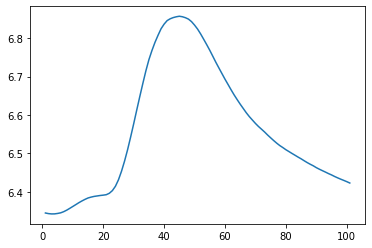

In [634]:
plt.plot(CSP_df[1])

In [723]:
find_inflection(df)

[]

In [709]:
SCR_res.index=range(0,len(SCR_res))

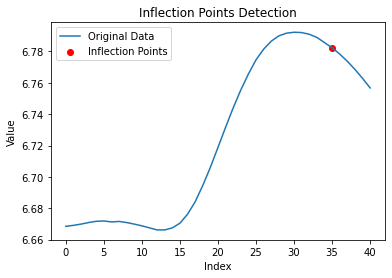

In [725]:
plt.plot(SCR_res[1], label='Original Data')
plt.scatter(35, SCR_res[1][35], color='red', label='Inflection Points')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Inflection Points Detection')
plt.show()

In [719]:
SCR_res[1]

0     6.6685
1     6.6691
2     6.6699
3     6.6709
4     6.6717
5     6.6719
6     6.6713
7     6.6716
8     6.6709
9     6.6699
10    6.6688
11    6.6675
12    6.6662
13    6.6662
14    6.6675
15    6.6705
16    6.6762
17    6.6841
18    6.6945
19    6.7061
20    6.7188
21    6.7316
22    6.7440
23    6.7554
24    6.7656
25    6.7746
26    6.7814
27    6.7865
28    6.7899
29    6.7916
30    6.7922
31    6.7920
32    6.7909
33    6.7889
34    6.7856
35    6.7823
36    6.7783
37    6.7737
38    6.7685
39    6.7628
40    6.7567
Name: 1, dtype: float64

In [637]:
data[find_inflection(data)[0]]

6.3891

In [642]:
SCR_rise[SCR_rise[0]<= SCR_rise[0].iloc[0] + max_rise_time][1].max()

6.8573

In [643]:
SCR_max = SCR_rise[SCR_rise[0]<= SCR_rise[0].iloc[0] + max_rise_time][1].max() -  data[find_inflection(data)[0]]

In [644]:
SCR_max

0.4682000000000004

In [476]:
SCR_max

6.8693

In [477]:
 SCR_response

0.5575000000000001

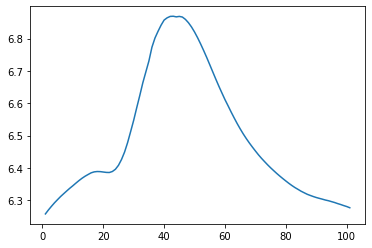

In [478]:
plt.plot(CSP_df[1])

In [56]:
diff=np.diff(SCR_res[1])

In [60]:
SCR_res

,0,1,2
476693,953.39,7.3252,0.0
476694,953.39,7.3252,0.0
476695,953.39,7.3252,0.0
476696,953.39,7.3251,0.0
476697,953.39,7.3251,0.0
...,...,...,...
478693,957.39,7.7071,0.0
478694,957.39,7.7076,0.0
478695,957.39,7.7080,0.0
478696,957.39,7.7084,0.0


In [89]:
SCR_max = SCR_rise[SCR_rise[0]<= SCR_rise[0].iloc[0] + max_rise_time][1]

In [92]:
SCR_max

1       7.3027
2       7.3027
3       7.3027
4       7.3028
5       7.3029
         ...  
2501    7.9223
2502    7.9222
2503    7.9221
2504    7.9221
2505    7.9221
Name: 1, Length: 2505, dtype: float64

In [90]:
SCR_max.index = range(1,len(SCR_max)+1)

In [93]:
np.array(SCR_max)

array([7.3027, 7.3027, 7.3027, ..., 7.9221, 7.9221, 7.9221])

In [73]:
SCR_res.index = range(1,len(SCR_res)+1)

In [82]:
min_index = SCR_res[1].idxmin()
print(min_index)

931


In [96]:
SCR_max.idxmax()

2415

In [98]:
SCR_max.iloc[2415] - SCR_res[1].iloc[989]

0.6199000000000003

In [95]:
import numpy as np
from scipy.signal import argrelextrema

# 示例数据
data = np.array([3, 2, 1, 2, 3, 6, 4, 1, 2, 5, 3])

# 找出局部最小值的索引
local_minima_indices = argrelextrema(np.array(SCR_res[1]), np.less)[0]

# 找出局部最大值的索引
local_maxima_indices = argrelextrema(np.array(SCR_max), np.greater)[0]

print("Local Minima Indices:", local_minima_indices)
print("Local Maxima Indices:", local_maxima_indices)

Local Minima Indices: [ 81  98 106 148 190 223 565 573 632 849 989]
Local Maxima Indices: [  14 2283 2316 2431]


In [77]:

# 找出局部最小值的索引
local_minima_indices = np.where((diff[:-1] > 0) & (diff[1:] < 0))[0] + 1

# 找出局部最大值的索引
local_maxima_indices = np.where((diff[:-1] < 0) & (diff[1:] > 0))[0] + 1

print("Local Minima Indices:", local_minima_indices)
print("Local Maxima Indices:", local_maxima_indices)

Local Minima Indices: [ 77 168 194 360 401 585 610 643 793 877 944]
Local Maxima Indices: [ 81  98 106 148 190 223 565 573 632 849 989]


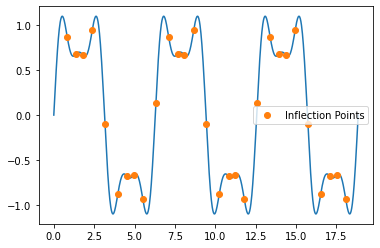

In [437]:
import numpy as np
import matplotlib.pyplot as plt

# 生成示例波形数据
x = np.linspace(0, 6*np.pi, 1000)
y = np.sin(x) + 0.5*np.sin(3*x) + 0.2*np.sin(5*x)

# 计算二阶导数
second_derivative = np.gradient(np.gradient(y, x), x)

# 找到拐点（二阶导数为零的点）
inflection_points = np.where(np.diff(np.sign(second_derivative)))[0] + 2

# 绘制波形和找到的拐点
plt.plot(x, y)
plt.plot(x[inflection_points], y[inflection_points], "o", label="Inflection Points")
plt.legend()
plt.show()

In [141]:
y

array([ 0.00000000e+00,  6.59952766e-02,  1.31725659e-01,  1.96928036e-01,
        2.61342848e-01,  3.24715827e-01,  3.86799697e-01,  4.47355815e-01,
        5.06155745e-01,  5.62982753e-01,  6.17633208e-01,  6.69917876e-01,
        7.19663107e-01,  7.66711896e-01,  8.10924810e-01,  8.52180781e-01,
        8.90377759e-01,  9.25433206e-01,  9.57284451e-01,  9.85888883e-01,
        1.01122400e+00,  1.03328727e+00,  1.05209593e+00,  1.06768648e+00,
        1.08011423e+00,  1.08945252e+00,  1.09579195e+00,  1.09923938e+00,
        1.09991692e+00,  1.09796071e+00,  1.09351966e+00,  1.08675413e+00,
        1.07783447e+00,  1.06693954e+00,  1.05425520e+00,  1.03997275e+00,
        1.02428731e+00,  1.00739628e+00,  9.89497719e-01,  9.70788799e-01,
        9.51464287e-01,  9.31715053e-01,  9.11726655e-01,  8.91677982e-01,
        8.71739992e-01,  8.52074527e-01,  8.32833240e-01,  8.14156628e-01,
        7.96173176e-01,  7.78998630e-01,  7.62735398e-01,  7.47472077e-01,
        7.33283117e-01,  

In [142]:
data = y

In [203]:
diff_data = np.diff(data)

# 计算一阶差分的一阶差分
diff2_data = np.diff(diff_data)


In [83]:
def find_inflection(data):
    inflection_points = np.zeros_like(data)
    diff_data = np.diff(data)
    diff2_data = np.diff(data,n=2)
    diff3_data = np.diff(data,n=3)
    for i in range(1, len(data) - 2):
        if (diff2_data[i] < 0+10**(-5)) & (diff2_data[i] > 0-10**(-5)):
            if (diff3_data[i-1] > 0) & (diff3_data[i]>0) & (diff3_data[i+1]>0) & (diff_data[i+2] < 0.05):
                inflection_points[i+2] = 1
    return(inflection_points)



In [85]:
CSP_df

,0,1,2
1,1082.4,5.7061,2.0
2,1082.5,5.7025,0.0
3,1082.6,5.6988,0.0
4,1082.7,5.6946,0.0
5,1082.8,5.6901,0.0
...,...,...,...
97,1092.0,5.6237,0.0
98,1092.1,5.6209,0.0
99,1092.2,5.6182,0.0
100,1092.3,5.6153,0.0


In [467]:
find_infel(data)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [463]:
np.diff(diff2_data)[19]

0.002500000000000391

In [438]:
inflection_points = np.where((diff2_data < 0+10**(-4)) & (diff2_data > 0-10**(-4)))[0] +2

In [459]:
diff_data.argmin()

54

In [440]:
inflection_points

array([20, 34, 55, 86, 91], dtype=int64)

In [352]:
diff_data[22]

0.006899999999999906

In [365]:
def fd(i):
    return(diff2_data[i-1] - diff2_data[i],diff2_data[i] - diff2_data[i+1], diff2_data[i+1] - diff2_data[i+2])

In [384]:
data

1      6.2579
2      6.2703
3      6.2816
4      6.2924
5      6.3022
        ...  
97     6.2899
98     6.2870
99     6.2837
100    6.2807
101    6.2770
Name: 1, Length: 101, dtype: float64

In [418]:
d2v = np.gradient(np.gradient(data))
    
# Initialize output arrays
inflection_points = np.zeros_like(data)
nslope = np.zeros_like(data)
    
# Find inflection points
for i in range(1, len(data) - 2):
    if d2v[i] < 0 and d2v[i+1] > 0:
        inflection_points[i] = 1
        nslope[i] = (data[i + 1] - data[i])
    elif d2v[i] > 0 and d2v[i+1] < 0:
        inflection_points[i] = 1
        nslope[i] = (data[i + 1] - data[i]) 

In [419]:
inflection_points

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [420]:
inflection_points[29]

0.0

In [374]:
fd(24)

(0.0008999999999996788, -0.0015000000000000568, 0.0015000000000000568)

In [354]:
diff2_data[32] - diff2_data[54]

-0.00020000000000042206

In [412]:
np.diff(data)

array([ 0.0124,  0.0113,  0.0108,  0.0098,  0.0096,  0.0086,  0.0085,
        0.0083,  0.0077,  0.0081,  0.0078,  0.0072,  0.0063,  0.0054,
        0.0052,  0.003 ,  0.0011, -0.0003, -0.0012, -0.0012, -0.0003,
        0.0031,  0.0069,  0.0122,  0.018 ,  0.0229,  0.0293,  0.0342,
        0.0349,  0.0389,  0.0376,  0.0394,  0.0338,  0.0337,  0.0427,
        0.0284,  0.0207,  0.019 ,  0.0158,  0.007 ,  0.0043,  0.0005,
       -0.0019,  0.0014, -0.002 , -0.0072, -0.0104, -0.0131, -0.0156,
       -0.0177, -0.0193, -0.0205, -0.0213, -0.0224, -0.0225, -0.0224,
       -0.0218, -0.0208, -0.0205, -0.0187, -0.0192, -0.0183, -0.0177,
       -0.0165, -0.0156, -0.0144, -0.0135, -0.0127, -0.0122, -0.0118,
       -0.0109, -0.0101, -0.0099, -0.0093, -0.0088, -0.0086, -0.0081,
       -0.0078, -0.0075, -0.0073, -0.0068, -0.0063, -0.0055, -0.0057,
       -0.0047, -0.0047, -0.0036, -0.0034, -0.0031, -0.0026, -0.0025,
       -0.0027, -0.0021, -0.0028, -0.0027, -0.0033, -0.0029, -0.0033,
       -0.003 , -0.0

In [411]:
np.gradient(data)

array([ 0.0124 ,  0.01185,  0.01105,  0.0103 ,  0.0097 ,  0.0091 ,
        0.00855,  0.0084 ,  0.008  ,  0.0079 ,  0.00795,  0.0075 ,
        0.00675,  0.00585,  0.0053 ,  0.0041 ,  0.00205,  0.0004 ,
       -0.00075, -0.0012 , -0.00075,  0.0014 ,  0.005  ,  0.00955,
        0.0151 ,  0.02045,  0.0261 ,  0.03175,  0.03455,  0.0369 ,
        0.03825,  0.0385 ,  0.0366 ,  0.03375,  0.0382 ,  0.03555,
        0.02455,  0.01985,  0.0174 ,  0.0114 ,  0.00565,  0.0024 ,
       -0.0007 , -0.00025, -0.0003 , -0.0046 , -0.0088 , -0.01175,
       -0.01435, -0.01665, -0.0185 , -0.0199 , -0.0209 , -0.02185,
       -0.02245, -0.02245, -0.0221 , -0.0213 , -0.02065, -0.0196 ,
       -0.01895, -0.01875, -0.018  , -0.0171 , -0.01605, -0.015  ,
       -0.01395, -0.0131 , -0.01245, -0.012  , -0.01135, -0.0105 ,
       -0.01   , -0.0096 , -0.00905, -0.0087 , -0.00835, -0.00795,
       -0.00765, -0.0074 , -0.00705, -0.00655, -0.0059 , -0.0056 ,
       -0.0052 , -0.0047 , -0.00415, -0.0035 , -0.00325, -0.00

diff3_data

In [355]:
data[inflection_points]

20    6.3875
34    6.6972
55    6.7193
86    6.3234
91    6.3060
Name: 1, dtype: float64

In [424]:
np.where(inflection_points == 1)

(array([30, 32, 34, 42, 43, 54, 92], dtype=int64),)

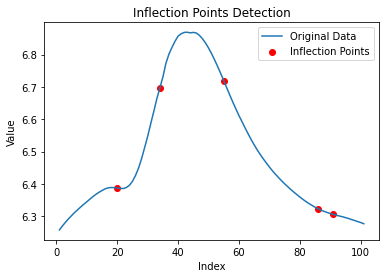

In [468]:
plt.plot(data, label='Original Data')
plt.scatter(inflection_points, data[inflection_points], color='red', label='Inflection Points')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Inflection Points Detection')
plt.show()

In [471]:
data[find_inflec(data)==1]

21    6.3863
Name: 1, dtype: float64

In [488]:
np.where(find_inflec(data) == 1)

(array([20], dtype=int64),)

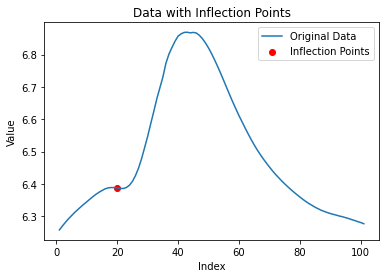

In [472]:
plt.plot(data, label='Original Data')
plt.scatter(np.where(find_inflec(data) == 1), data[find_inflec(data)==1], color='red', label='Inflection Points')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Data with Inflection Points')
plt.legend()
plt.show()

In [432]:
inflection_points

array([20, 34, 55, 86, 91], dtype=int64)

In [379]:
np.sign(second_derivative)

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [123]:
data

[-125000000,
 -124251499,
 -123505992,
 -122763473,
 -122023936,
 -121287375,
 -120553784,
 -119823157,
 -119095488,
 -118370771,
 -117649000,
 -116930169,
 -116214272,
 -115501303,
 -114791256,
 -114084125,
 -113379904,
 -112678587,
 -111980168,
 -111284641,
 -110592000,
 -109902239,
 -109215352,
 -108531333,
 -107850176,
 -107171875,
 -106496424,
 -105823817,
 -105154048,
 -104487111,
 -103823000,
 -103161709,
 -102503232,
 -101847563,
 -101194696,
 -100544625,
 -99897344,
 -99252847,
 -98611128,
 -97972181,
 -97336000,
 -96702579,
 -96071912,
 -95443993,
 -94818816,
 -94196375,
 -93576664,
 -92959677,
 -92345408,
 -91733851,
 -91125000,
 -90518849,
 -89915392,
 -89314623,
 -88716536,
 -88121125,
 -87528384,
 -86938307,
 -86350888,
 -85766121,
 -85184000,
 -84604519,
 -84027672,
 -83453453,
 -82881856,
 -82312875,
 -81746504,
 -81182737,
 -80621568,
 -80062991,
 -79507000,
 -78953589,
 -78402752,
 -77854483,
 -77308776,
 -76765625,
 -76225024,
 -75686967,
 -75151448,
 -74618461,
 -74

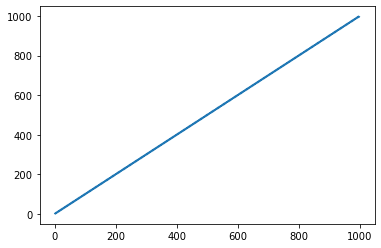

In [111]:
plt.plot(data)

In [115]:
f(1)

2

In [117]:
1^3

2

In [118]:
def f(x) :
    return(x**3)

In [119]:
data =[f(x) for x in range(-500,500)]

In [120]:
data

[-125000000,
 -124251499,
 -123505992,
 -122763473,
 -122023936,
 -121287375,
 -120553784,
 -119823157,
 -119095488,
 -118370771,
 -117649000,
 -116930169,
 -116214272,
 -115501303,
 -114791256,
 -114084125,
 -113379904,
 -112678587,
 -111980168,
 -111284641,
 -110592000,
 -109902239,
 -109215352,
 -108531333,
 -107850176,
 -107171875,
 -106496424,
 -105823817,
 -105154048,
 -104487111,
 -103823000,
 -103161709,
 -102503232,
 -101847563,
 -101194696,
 -100544625,
 -99897344,
 -99252847,
 -98611128,
 -97972181,
 -97336000,
 -96702579,
 -96071912,
 -95443993,
 -94818816,
 -94196375,
 -93576664,
 -92959677,
 -92345408,
 -91733851,
 -91125000,
 -90518849,
 -89915392,
 -89314623,
 -88716536,
 -88121125,
 -87528384,
 -86938307,
 -86350888,
 -85766121,
 -85184000,
 -84604519,
 -84027672,
 -83453453,
 -82881856,
 -82312875,
 -81746504,
 -81182737,
 -80621568,
 -80062991,
 -79507000,
 -78953589,
 -78402752,
 -77854483,
 -77308776,
 -76765625,
 -76225024,
 -75686967,
 -75151448,
 -74618461,
 -74

In [104]:
find_peaks(-second_derivative)

(array([2, 4], dtype=int64), {})

In [103]:
-second_derivative 

array([ 0, -2,  0, -2,  5,  1, -4, -2,  5])

In [50]:
for i in range(len(local_maxima_indices)):
    print(local_minima_indices[i],local_maxima_indices[i])

18 7
127 114
143 248
177 331
243 348
327 356
418 398
444 440
610 473
651 815
835 823
860 882
893 1099
1043 1239
1127 3608
1194 3700
3463 3742


In [47]:
diff[:-1]

array([ 1.e-04,  0.e+00,  0.e+00, ..., -1.e-04, -1.e-04, -1.e-04])

In [6]:
argrelextrema(data, np.less)

(array([2, 7], dtype=int64),)

In [70]:
np.array(SCR_res[1])

array([7.3252, 7.3252, 7.3252, ..., 7.708 , 7.7084, 7.7088])

In [2]:
import matplotlib.pyplot as plt

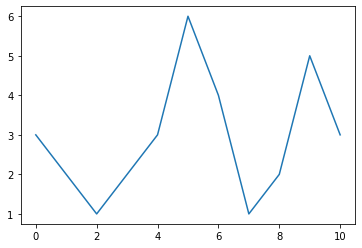

In [3]:
plt.plot(data)

In [3]:
len(CSM_df)

5005

### CSP_df

In [ ]:
from tkinter import Scale

In [ ]:
del df

In [ ]:
def SCR_resp(situation,target):
    global place_SCR
    place_SCR = df.loc[df[2]==situation].iloc[-target][0]
    SCR_df = df[(df[0]>= place_SCR) & (df[0]<= place_SCR+display_window)]
    #Estimate CS Response
    SCR_res = df[(df[0]>= place_SCR+rise_begin) & (df[0]<= place_SCR+rise_end)]
    min_index = SCR_res[1].idxmin()
    SCR_rise = SCR_df[SCR_df.index >= min_index]
    SCR_max = SCR_rise[SCR_rise[0]<= SCR_rise[0].iloc[0] + max_rise_time][1].max()
    SCR_response = SCR_max - min(SCR_res[1])
    return(SCR_response)

In [ ]:
    CSP_response = SCR_resp(2,target)
    print(CSP_response)

In [ ]:
SCR_resp(2,target)

In [ ]:
file_path

In [ ]:
df

In [ ]:
SCR_resp(1,target)

In [ ]:
diff

In [ ]:
def SCR_resp(situation,target):
    global place_SCR
    place_SCR = df.loc[df[2]==situation].iloc[-target][0]
    SCR_df = df[(df[0]>= place_SCR) & (df[0]<= place_SCR+display_window)]
    #Estimate CS Response
    SCR_res = df[(df[0]>= place_SCR+rise_begin) & (df[0]<= place_SCR+rise_end)]
    min_index = SCR_res[1].idxmin()
    SCR_rise = SCR_df[SCR_df.index >= min_index]
    SCR_max = SCR_rise[SCR_rise[0]<= SCR_rise[0].iloc[0] + max_rise_time][1].max()
    SCR_response = SCR_max - min(SCR_res[1])
    return(SCR_response)

In [ ]:
df = pd.read_csv(file_path, delimiter="\t", header=None)

In [ ]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def data_analysis(file_path, min_y_ax1_ax2, max_y_ax1_ax2, min_y_ax3, max_y_ax3):
    # load data
    df = pd.read_csv(file_path, delimiter="\t", header=None)
    # data selected
    csm = df[df[2] == 1]
    csm.index = range(0, len(csm))
    us = df[df[2] == 3]
    us.index = range(0, len(us))
    csp = df[df[2] == 2]
    csp.index = range(0, len(csp))
    
    # figure
    figure.clear()
    ax1 = figure.add_subplot(131)
    ax2 = figure.add_subplot(132)
    ax3 = figure.add_subplot(133)
    ax1.set_ylim(min_y_ax1_ax2, max_y_ax1_ax2)
    ax2.set_ylim(min_y_ax1_ax2, max_y_ax1_ax2)
    ax3.set_ylim(min_y_ax3, max_y_ax3)
    ax1.plot(csm[1] / max(us[1]))
    ax1.set_title("CS-")
    ax2.plot(csp[1] / max(us[1]))
    ax2.set_title("CS+")
    ax3.plot((csp[1] - csm[1]) / max(us[1]))
    ax3.set_title("Difference")
    plt.tight_layout()
    canvas.draw()

def open_file():
    file_path = filedialog.askopenfilename(initialdir="/", title="选择数据", filetypes=(("txt files", "*.txt"), ("all files", "*.*")))
    if file_path:
        data_analysis(file_path,min_y_ax1_ax2,max_y_ax1_ax2,min_y_ax3,max_y_ax3 )

def open_parameter_window():
    param_window = tk.Toplevel(window)
    param_window.title("参数调整")

    tk.Label(param_window, text="设置ax1和ax2的y轴下限：").pack()
    min_y_ax1_ax2 = tk.Entry(param_window)
    min_y_ax1_ax2.pack()

    tk.Label(param_window, text="设置ax1和ax2的y轴上限：").pack()
    max_y_ax1_ax2 = tk.Entry(param_window)
    max_y_ax1_ax2.pack()

    tk.Label(param_window, text="设置ax3的y轴下限：").pack()
    min_y_ax3 = tk.Entry(param_window)
    min_y_ax3.pack()

    tk.Label(param_window, text="设置ax3的y轴上限：").pack()
    max_y_ax3 = tk.Entry(param_window)
    max_y_ax3.pack()

    confirm_btn = tk.Button(param_window, text="确认", command=lambda: apply_parameters(min_y_ax1_ax2.get(), max_y_ax1_ax2.get(), min_y_ax3.get(), max_y_ax3.get()))
    confirm_btn.pack()

def apply_parameters(min_y_ax1_ax2, max_y_ax1_ax2, min_y_ax3, max_y_ax3):
    try:
        min_y_ax1_ax2 = float(min_y_ax1_ax2)
        max_y_ax1_ax2 = float(max_y_ax1_ax2)
        min_y_ax3 = float(min_y_ax3)
        max_y_ax3 = float(max_y_ax3)

        # 更新参数
        ax1.set_ylim(min_y_ax1_ax2, max_y_ax1_ax2)
        ax2.set_ylim(min_y_ax1_ax2, max_y_ax1_ax2)
        ax3.set_ylim(min_y_ax3, max_y_ax3)

        # 重新绘制图形并传递参数值
        data_analysis(file_path, min_y_ax1_ax2, max_y_ax1_ax2, min_y_ax3, max_y_ax3)

        canvas.draw()
    except ValueError:
        tk.messagebox.showerror("错误", "请输入有效的数值")

window = tk.Tk()
window.title('Fear Display')

# 顶部区域：按钮和标题
top_frame = tk.Frame(window, bg='white')
top_frame.pack(fill=tk.X)

data_btn = tk.Button(top_frame, text='选择数据文件 (*.txt)', command=open_file)
data_btn.pack(side=tk.LEFT, padx=10, pady=10)

param_btn = tk.Button(top_frame, text='参数调整', command=open_parameter_window)
param_btn.pack(side=tk.LEFT, padx=10, pady=10)

# 中间区域：图表显示区域
middle_frame = tk.Frame(window, bg='white')
middle_frame.pack(fill=tk.BOTH, expand=True)

figure = plt.figure(figsize=(10, 6))
canvas = FigureCanvasTkAgg(figure, master=middle_frame)
canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

min_y_ax1_ax2 = 0
max_y_ax1_ax2 = 1.1
min_y_ax3 = -0.3
max_y_ax3 = 0.3

# 设置窗口大小
window.geometry('800x600')
window.mainloop()

In [ ]:
df.head()

In [ ]:
csm = df[df[2] == 1]
csm.index = range(0,len(csm))

In [ ]:
us = df[df[2] == 3]
us.index = range(0,len(us))

In [ ]:
us.head()

In [ ]:
csm

In [ ]:
csm[1]/max(us[1])

In [ ]:
plt.plot(csm[1]/max(us[1]))

In [ ]:
csp = df[df[2] == 2]
csp.index = range(0,len(csp))

In [ ]:
plt.plot(csp[1]/max(us[1]))
plt.ylim(0,1.1)

In [ ]:
plt.plot((csp[1]-csm[1])/max(us[1]))

In [ ]:
df.loc[df[2]==1].iloc[-1]

In [ ]:
place_CSM = df.loc[df[2]==1].iloc[-1][0]

In [ ]:
df

In [ ]:
rise_begin = 0.5
rise_end = 4.5
window_display = 10.0
max_rise_time = 5.0

In [ ]:
CSM_df = df[(df[0]>= place_CSM) & (df[0]<= place_CSM+window_display)]

In [ ]:
CSM_df

In [ ]:
CSM_res = df[(df[0]>= place_CSM+rise_begin) & (df[0]<= place_CSM+rise_end)]

In [ ]:
min_index = CSM_res[1].idxmin()

In [ ]:
CSM_rise = CSM_df[CSM_df.index >= min_index]

In [ ]:
CSM_max = CSM_rise[CSM_rise[0]<= CSM_rise[0].iloc[0] + max_rise_time][1].max()

In [ ]:
CSM_max

In [ ]:
 min(CSM_res[1])

In [ ]:
CSM = CSM_max - min(CSM_res[1])

In [ ]:
CSM

In [ ]:
CSM_max

In [ ]:
CSM_res

In [ ]:
CSM_max

In [ ]:
plt.plot(CSM_df[1])

In [ ]:
min_index = CSM_res[1].idxmin()

In [ ]:
CSM

In [ ]:
df_res[1]max(CSM_res[1])

In [ ]:
place_CSP = df.loc[df[2]==2].iloc[-1][0]
CSP_df = df[(df[0]>= place_CSP) & (df[0]<= place_CSP+display_window)]
plt.plot(CSP_df[1])

In [ ]:
CSP_res = df[(df[0]>= place_CSP+rise_begin) & (df[0]<= place_CSP+rise_end)]
min_index = CSP_res[1].idxmin()
CSP_rise = CSP_df[CSP_df.index >= min_index]
CSP_max = CSP_rise[df[0]<= CSP_rise[0].iloc[0] + max_rise_time][1].max()

In [ ]:
min(CSP_res)

In [ ]:
CSP_max - min(CSP_res[1])

In [ ]:
CSP_max

In [ ]:
max(CSP_res[1])

In [ ]:
max_index = CSP_res[1].idxmax()
min_index = CSP_res[1].idxmin()
if max_index >= min_index :
    CSP = max(CSP_res[1]) - min(CSP_res[1])
else:
    CSP = 0

In [ ]:
print(max_index,min_index)

In [ ]:
CSP

In [ ]:
CSP_res = df[(df[0]>= place_CSP+rise_begin) & (df[0]<= place_CSP+rise_end)]
CSP = max(CSP_res[1]) - min(CSP_res[1])
print(CSP)

In [ ]:
file_path

In [ ]:
#Define Parameter
rise_begin = 0.5
rise_end = 4.5
window = 10.0
max_rise_time = 5.0
#graph CS Response
place_CSP = df.loc[df[2]==2].iloc[-1][0]
CSP_df = df[(df[0]>= place_CSP) & (df[0]<= place_CSP+window)]
plt.plot(CSP_df[1])
#Estimate CS Response
CSP_res = df[(df[0]>= place_CSP+rise_begin) & (df[0]<= place_CSP+rise_end)]
min_index = CSP_res[1].idxmin()
CSP_rise = CSP_df[CSP_df.index >= min_index]
CSP_max = CSP_rise[CSP_rise[0]<= CSP_rise[0].iloc[0] + max_rise_time][1].max()
CSP_response = CSP_max - min(CSP_res[1])

In [ ]:
#Define Parameter
rise_begin = 0.5
rise_end = 4.5
window = 10.0
max_rise_time = 5.0
#graph CS Response
place_CSM = df.loc[df[2]==1].iloc[-1][0]
CSM_df = df[(df[0]>= place_CSM) & (df[0]<= place_CSM+window)]
plt.plot(CSM_df[1])
#Estimate CS Response
CSM_res = df[(df[0]>= place_CSM+rise_begin) & (df[0]<= place_CSM+rise_end)]
min_index = CSM_res[1].idxmin()
CSM_rise = CSM_df[CSM_df.index >= min_index]
CSM_max = CSM_rise[CSM_rise[0]<= CSM_rise[0].iloc[0] + max_rise_time][1].max()
CSM_response = CSM_max - min(CSM_res[1])

In [ ]:
SCR_resp(1,1)

In [ ]:
CSM_response

In [ ]:
CSP_response

In [ ]:
##Define function
def SCR_resp(rise_begin,rise_end,window,max_rise_time,situation,target):
    place_SCR = df.loc[df[2]==situation].iloc[target-1][0]
    SCR_df = df[(df[0]>= place_SCR) & (df[0]<= place_SCR+window)]
    #Estimate CS Response
    SCR_res = df[(df[0]>= place_SCR+rise_begin) & (df[0]<= place_SCR+rise_end)]
    min_index = SCR_res[1].idxmin()
    SCR_rise = SCR_df[SCR_df.index >= min_index]
    SCR_max = SCR_rise[SCR_rise[0]<= SCR_rise[0].iloc[0] + max_rise_time][1].max()
    SCR_response = SCR_max - min(SCR_res[1])
    return(SCR_response)

In [ ]:
df[0]

In [ ]:
df.loc[df[2]==2].iloc[19-1][0]

In [ ]:
SCR_resp(0.5,4.5,10,5,2,len(df[df[2]==2]))

In [ ]:
df.loc[df[2]==3]

In [ ]:
len(df.loc[df[2]==3])

In [ ]:
SCR_resp(3,1)

In [ ]:
US_list=[]
for i in range(1,len(df.loc[df[2]==3])+1):
    US_list.append(SCR_resp(3,i))
Max_US = max(US_list)

In [ ]:
US_list

In [ ]:
Max_US

In [ ]:
US_list.append(SCR_resp(3,i))

In [ ]:
    CSM_resposne = SCR_resp(1,target)
    CSM_df = df[(df[0]>= place_SCR) & (df[0]<= place_SCR+display_window)]

In [ ]:
CSM_response

In [ ]:
file_path

In [ ]:
    global place_SCR
    place_SCR = df.loc[df[2]==2].iloc[-target][0]
    #Estimate CS Response
    SCR_res = df[(df[0]>= place_SCR+rise_begin) & (df[0]<= place_SCR+rise_end)]
    min_index = SCR_res[1].idxmin()
    SCR_rise = SCR_res[SCR_res.index >= min_index]
    SCR_max = SCR_rise[SCR_rise[0]<= SCR_rise[0].iloc[0] + max_rise_time][1].max()
    print(SCR_max)
    SCR_response = SCR_max - min(SCR_res[1])

In [ ]:
CSP_res = df[(df[0]>= place_CSP+rise_begin) & (df[0]<= place_CSP+rise_end)]
min_index = CSP_res[1].idxmin()
CSP_rise = CSP_df[CSP_df.index >= min_index]
CSP_max = CSP_rise[df[0]<= CSP_rise[0].iloc[0] + max_rise_time][1].max()

In [ ]:
CSP_rise

In [ ]:
SCR_response

In [ ]:
CSP_max

In [ ]:
from tkinter import filedialog

import pandas as pd

import numpy as np

import tkinter as tk

from tkinter import ttk

import tkinter.messagebox

from tkinter import Scale

import matplotlib.pyplot as plt

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

from scipy.signal import find_peaks

#window

window = tk.Tk()
window.title('Fear Display')
window.geometry('800x600')
window.configure(background='white')

#Define Default Parameter
rise_begin = 0.5
rise_end = 4.5
display_window = 10.0
max_rise_time = 5.0
target = 1

#main program
##Find inflection
"""def find_inflection(data):
    inflection_points = list()
    diff_data = np.diff(data[1])
    diff2_data = np.diff(data[1],n=2)
    diff3_data = np.diff(data[1],n=3)
    for i in range(0, len(data[1]) - 3):
        if (diff2_data[i] < 0+10**(-5)) & (diff2_data[i] > 0-10**(-5)):
            if  (diff3_data[i] > 0) &(diff_data[i+1] < 0.005):
                inflection_points.append(i+2)
    return(inflection_points)"""
##Define SCR Response
def SCR_resp(rise_begin, rise_end, max_rise_time, situation, target,display_window):
    warning_min = 0
    warning_max = 0
    max_index = 0
    min_index = 0
    place_SCR = df.loc[df[2] == situation].iloc[-target][0]
    # Estimate CS Response
    #SCR_start = df[(df[0] >= place_SCR + rise_begin) & (df[0] <= place_SCR + rise_end)]
    #SCR_window = df[(df[0]>= place_SCR + rise_begin) & (df[0]<= place_SCR+display_window-rise_begin)]
    g
    SCR_start = df[(df[0] >= place_SCR) & (df[0] <= place_SCR + rise_end)]
    SCR_df = df[(df[0]>= place_SCR) & (df[0]<= place_SCR+display_window)]
    trough_index = find_peaks(-SCR_start[1])[0]
    SCR_response = 0
    if len(trough_index) == 0 :
        SCR_response = 0
        min_index = 0
        max_index = 0
        if rise_begin == 0:
            warning_min += 1
            min_index = SCR_start[1].idxmin()
            if (min_index+int(max_rise_time/0.1)) <= SCR_df.iloc[-1].name:
                SCR_peaks = SCR_df.loc[min_index:min_index + int(max_rise_time/0.1)]
            else:
                SCR_peaks = SCR_df.loc[min_index:]
            peak_index = find_peaks(SCR_peaks[1])[0]
            SCR_min = SCR_peaks[1].iloc[0]
            if len(peak_index) == 0 :
                SCR_response = 0
                min_index = 0
                max_index = 0
            else:
                SCR_peakrow = SCR_peaks.iloc[peak_index[0]]
                SCR_max = SCR_peakrow[1]
                SCR_response_temp = SCR_max - SCR_min
                if SCR_response_temp > SCR_response:
                    SCR_response = SCR_response_temp
                    max_index = SCR_peakrow.name
    else:
        for i in range(len(trough_index)):
            if (min_index+int(max_rise_time/0.1)) <= SCR_df.iloc[-1].name:
                SCR_peaks = SCR_df[trough_index[i]:trough_index[i] + int(max_rise_time/0.1)+1]
            else:
                SCR_peaks = SCR_df[trough_index[i]:]
            peak_index = find_peaks(SCR_peaks[1])[0]
            SCR_troughrow = SCR_peaks.iloc[0]
            SCR_min = SCR_troughrow[1]
            min_index_temp = SCR_troughrow.name
            if len(peak_index) == 0:
                SCR_response = 0
                min_index = 0
                max_index = 0

            else:
                SCR_peakrow = SCR_peaks.iloc[peak_index[0]]
                SCR_max = SCR_peakrow[1]
                SCR_response_temp = SCR_max - SCR_min
                if SCR_response_temp > SCR_response:
                    SCR_response = SCR_response_temp
                    max_index = SCR_peakrow.name
                    min_index = min_index_temp
    SCR_res_figure = SCR_df.loc[min_index:max_index]
    trough_check = find_peaks(-SCR_res_figure[1])[0]
    if len(trough_check) != 0:
        SCR_response = 0
        min_index = 0
        max_index = 0
        SCR_res_figure = SCR_df.loc[min_index:max_index]
    return(SCR_response,SCR_df,SCR_res_figure)

#Graph Updata

def update_plot(event=None):
    ##graw graph
    figure.clear()
    ax1 = figure.add_subplot(121)
    ax3 = figure.add_subplot(122)
    ax1.set_ylim(min_y_ax1_ax2 - y_scale_value_ax1.get(),max_y_ax1_ax2 + y_scale_value_ax1.get())
    ax3.set_ylim(min_y_ax3 - y_scale_value_ax3.get(), max_y_ax3 + y_scale_value_ax3.get())
    ax1.plot(CSP_df[1],label = "CS+")
    ax1.plot(CSP_res_figure[1],"red")
    ax1.plot(CSM_df[1],"green",label = "CS-")
    ax1.plot(CSM_res_figure[1],"red")
    """for i in range(len(infl)):
        ax1.scatter(infl[i],CSP_df[1].iloc[infl[i]])
    for i in range(len(infl2)):
        ax1.scatter(infl2[i],CSM_df[1].iloc[infl2[i]])"""
    ax1.set_title("CS+ & CS-")
    ax1.legend()
    ax3.plot((CSP_df[1] - CSM_df[1]))
    ax3.set_title("Difference")
    plt.tight_layout()
    canvas.draw()

## Find Maximum US
def max_US_resp(rise_begin,rise_end, max_rise_time, target,display_window):
    if rise_end <= 9.2:
        rise_end = 9.2
    US_len = len(df.loc[df[2] == 3])
    max_us = 0
    max_us_list = [SCR_resp(rise_begin, rise_end, max_rise_time,3,target,display_window)[0] for target in range(1,US_len+1)]
    max_us_temp = max(max_us_list)
    if max_us_temp > max_us and max_us_list != 0 :
        max_us = max_us_temp
    return(max_us)


## Update CS_response

def CS_resp_update(CSP_res_temp,CSM_res_temp,CSP_df_temp,CSM_df_temp,CSP_res_figure_temp,CSM_res_figure_temp):
    global CSP_response
    global CSM_response
    global CSP_df
    global CSM_df
    global CSP_res_figure
    global CSM_res_figure
    CSP_response = CSP_res_temp
    CSM_response = CSM_res_temp
    CSP_df = CSP_df_temp 
    CSM_df = CSM_df_temp 
    CSP_res_figure = CSP_res_figure_temp
    CSM_res_figure = CSM_res_figure_temp
    CSP_label.config(text=f"CS+ Response:{CSP_response:}")
    CSM_label.config(text=f"CS- Response:{CSM_response:}")
    diff = round(CSP_response - CSM_response,4)
    Diff_label.config(text=f"Difference:{diff}")
    reward = round(300 - 100*diff)
    reward_label.config(text=f"Reward:{reward:}")
    if len(CSP_res_figure) != 0:
        CSP_initial = CSP_res_figure.iloc[0].name
        CSP_res_figure.index = range(CSP_df.index.get_loc(CSP_initial)+1,CSP_df.index.get_loc(CSP_initial)+len(CSP_res_figure)+1)
    if len(CSM_res_figure) != 0:
        CSM_initial = CSM_res_figure.iloc[0].name
        CSM_res_figure.index = range(CSM_df.index.get_loc(CSM_initial)+1,CSM_df.index.get_loc(CSM_initial)+len(CSM_res_figure)+1)
    CSP_df.index = range(1,len(CSP_df)+1)
    CSM_df.index = range(1,len(CSM_df)+1)
    ##Find y-axis
    global min_y_ax1_ax2
    global max_y_ax1_ax2
    min_y_ax1_ax2 = min(min(CSP_df[1]),min(CSM_df[1])) - 0.5
    max_y_ax1_ax2 = max(max(CSP_df[1]),max(CSM_df[1])) + 0.5
    global min_y_ax3
    global max_y_ax3
    min_y_ax3 = min(CSP_df[1]-CSM_df[1]) - 0.5
    max_y_ax3 = max(CSP_df[1]-CSM_df[1]) + 0.5
    


##Data analysis
def data_analysis(file_path, rise_begin,rise_end,display_window,max_rise_time,target):
    global CSP_response_ns
    global CSM_response_ns
    global CSP_df_ns
    global CSM_df_ns
    global CSP_res_figure_ns
    global CSM_res_figure_ns
    global CSP_response_stand
    global CSM_response_stand
    global CSP_df_stand
    global CSM_df_stand
    global CSP_res_figure_stand
    global CSM_res_figure_stand
    global df
    # load data
    df = pd.read_csv(file_path, delimiter="\t", header=None)
    #CS Response
    ##CS+
    CSP_fun = SCR_resp(rise_begin,rise_end,max_rise_time,2,target,display_window)
    CSP_response_ns = round(CSP_fun[0],4)
    CSP_df_ns = CSP_fun[1]
    CSP_res_figure_ns = CSP_fun[2]
    ##CS-
    CSM_fun = SCR_resp(rise_begin,rise_end,max_rise_time,1,target,display_window)
    CSM_response_ns = round(CSM_fun[0],4)
    CSM_df_ns = CSM_fun[1]
    CSM_res_figure_ns = CSM_fun[2]
    ##Standarization
    ###US
    max_us = round(max_US_resp(rise_begin,rise_end, max_rise_time, target,display_window),4)
    MUS_label.config(text=f"Max US:{max_us:}")
    ###Standarize CSP and CSM
    CSP_response_stand = round(CSP_response_ns/max_us,4)
    CSM_response_stand = round(CSM_response_ns/max_us,4)
    CSP_df_stand = CSP_df_ns/max_us
    CSM_df_stand = CSM_df_ns/max_us
    CSP_res_figure_stand = CSP_res_figure_ns/max_us
    CSM_res_figure_stand = CSM_res_figure_ns/max_us
    if max_analysis_var.get() == 1:
        CS_resp_update(CSP_response_stand,CSM_response_stand,CSP_df_stand,CSM_df_stand,CSP_res_figure_stand,CSM_res_figure_stand)
    else:
        CS_resp_update(CSP_response_ns,CSM_response_ns,CSP_df_ns,CSM_df_ns,CSP_res_figure_ns,CSM_res_figure_ns)
    # figure
    ##reset index
    """global infl
    infl = find_inflection(CSP_df)
    print(infl)
    global infl2
    infl2 = find_inflection(CSM_df)
    print("CSP",infl2)"""
    ##graw graph
    update_plot()

#parameter update
def adjust_parameters():
    param_window = tk.Toplevel(window)
    param_window.title("Parameter Adjustment")
    
    # Adjust window place
    main_window_x = window.winfo_x()
    main_window_y = window.winfo_y()
    main_window_width = window.winfo_width()
    param_window_x = main_window_x + main_window_width + 10 
    param_window_y = main_window_y
    # Adjust the size of the window
    param_window.geometry("300x250+{}+{}".format(param_window_x, param_window_y))
    
    ## Rise time begin and end 
    tk.Label(param_window, text="Rise Time Begin").pack()
    rise_begin = tk.Entry(param_window)
    rise_begin.insert(0, "0.5")
    rise_begin.pack()
    
    tk.Label(param_window, text="Rise Time End").pack()
    rise_end = tk.Entry(param_window)
    rise_end.insert(0, "4.5")
    rise_end.pack()    
    ## window
    tk.Label(param_window, text="Window").pack()
    display_window = tk.Entry(param_window)
    display_window.insert(0, "10")
    display_window.pack()
    ## maximum rise time
    tk.Label(param_window, text="Maximum Rise Time").pack()
    max_rise_time = tk.Entry(param_window)
    max_rise_time.insert(0, "5.0")
    max_rise_time.pack()
    ##target
    tk.Label(param_window, text="Target").pack()
    target = tk.Entry(param_window)
    target.insert(0, "1")
    target.pack()
    
    confirm_btn = tk.Button(param_window, text="Apply", command=lambda: apply_parameters(rise_begin.get(), rise_end.get(),
                                                                                         display_window.get(), max_rise_time.get(), target.get()))
    confirm_btn.pack()

def apply_parameters(rise_begin, rise_end, display_window, max_rise_time, target):
    try:
        rise_begin = float(rise_begin)
        rise_end = float(rise_end)
        display_window = float(display_window)
        max_rise_time = float(max_rise_time)
        target = int(target)
        if (target<= 0) or (target>= len(df[df[2]==2])+1):
            tk.messagebox.showerror("Invalid Value", "Error, please type valid value.")
        else:
        # Re-plot
            data_analysis(file_path, rise_begin, rise_end, display_window, max_rise_time, target)
    except ValueError:
        tk.messagebox.showerror("Invalid Value", "Error, please type valid value.")

        
        
#Standardize checkbox
def toggle_analysis():
    if max_analysis_var.get() == 1:
        CS_resp_update(CSP_response_stand,CSM_response_stand,CSP_df_stand,CSM_df_stand,CSP_res_figure_stand,CSM_res_figure_stand)
        update_plot()
    else:
        CS_resp_update(CSP_response_ns,CSM_response_ns,CSP_df_ns,CSM_df_ns,CSP_res_figure_ns,CSM_res_figure_ns)
        update_plot()
        

#load file
def open_file():
    global file_path
    file_path = filedialog.askopenfilename(initialdir="/", title="Choose Data", filetypes=(("txt files", "*.txt"), ("all files", "*.*")))
    if file_path:
        data_analysis(file_path,rise_begin,rise_end,display_window,max_rise_time,target)


#Create Bottom
top_frame = tk.Frame(window, bg='white')
top_frame.pack(fill=tk.BOTH)

data_btn = tk.Button(top_frame, text='Input Data (*.txt)', command=open_file)
data_btn.pack(fill=tk.BOTH, expand=True) 

param_btn = tk.Button(top_frame, text='Parameter Adjustment', command=adjust_parameters)
param_btn.pack(fill=tk.BOTH, expand=True) 

# Create a button to trigger analysis
max_analysis_var = tk.IntVar()
max_analysis_checkbox = ttk.Checkbutton(top_frame, text="Standardize", variable=max_analysis_var,command = toggle_analysis)
max_analysis_checkbox.pack(side=tk.LEFT)

# Create a frame to hold the labels
label_frame = tk.Frame(window, bg='white')
label_frame.pack(fill=tk.BOTH, expand=True)

# CS+
CSP_label = tk.Label(label_frame, text="CS+ Response:", font=("Times New Roman", 10), bg='white')
CSP_label.grid(row=1, column=1, padx=30, pady=10)

# CS-
CSM_label = tk.Label(label_frame, text="CS- Response:", font=("Times New Roman", 10), bg='white')
CSM_label.grid(row=1, column=2, padx=30, pady=10)

#Max US

MUS_label = tk.Label(label_frame, text="Max US:", font=("Times New Roman", 10), bg='white')
MUS_label.grid(row=1, column=3, padx=30, pady=10)

# Difference
Diff_label = tk.Label(label_frame, text="Difference:", font=("Times New Roman", 10), bg='white')
Diff_label.grid(row=1, column=4, padx=30, pady=10)

# Reward
reward_label = tk.Label(label_frame, text="Reward: ", font=("Times New Roman", 10), bg='white')
reward_label.grid(row=1, column=5, padx=30, pady=10)

#Create Canvas
middle_frame = tk.Frame(window, bg='white')
middle_frame.pack(fill=tk.BOTH, expand=True)

#create Bar
scale_frame = tk.Frame(window)
scale_frame.pack(side=tk.BOTTOM, fill=tk.BOTH)

y_scale_value_ax1 = tk.DoubleVar(value = 0)
y_scale_ax1 = Scale(scale_frame, from_=0, to=5, resolution=0.01, orient="horizontal", variable=y_scale_value_ax1, command=update_plot, length=350)
y_scale_ax1.pack(side=tk.LEFT, padx=10)

y_scale_value_ax3 = tk.DoubleVar(value = 0)
y_scale_ax3 = Scale(scale_frame, from_=0, to=5, resolution=0.01, orient="horizontal", variable=y_scale_value_ax3, command=update_plot, length=350)
y_scale_ax3.pack(side=tk.RIGHT, padx=10)

#Defalut Canvas
figure = plt.figure(figsize=(10, 6))
canvas = FigureCanvasTkAgg(figure, master=middle_frame)
canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
ax1 = figure.add_subplot(121)
ax3 = figure.add_subplot(122)
ax1.set_ylim(2.0,8.0) 
ax3.set_ylim(-1.0, 1.0) 
window.mainloop()